#Q.no 1 Company data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from collections import Counter
from sklearn.tree import  DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [3]:
data=pd.read_csv('Company_Data (1).csv')

In [4]:
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

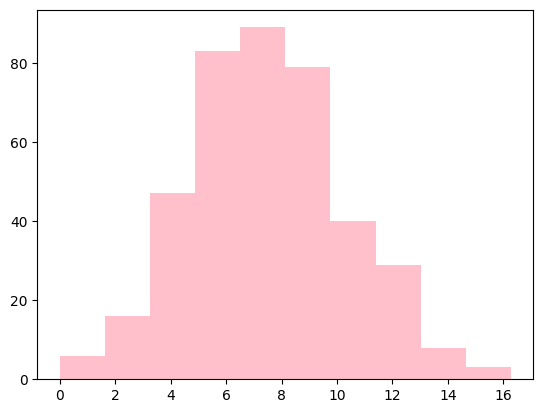

In [9]:
plt.hist('Sales',data=data,color='pink')
plt.show()

sales graph looks like normal distribution and not skewed

with mean or median we can make two or three categories such as 
1.Low
2.Medium
3.High

In [10]:
data1 =data.copy()
data['Sales_cat'] = pd.cut(x = data1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [11]:
data.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [14]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

DATA ANALYSIS

In [15]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']


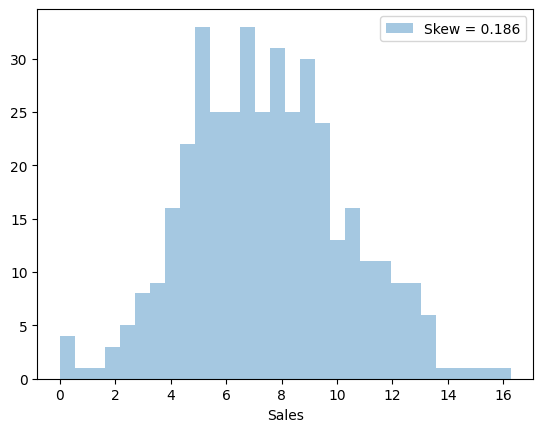

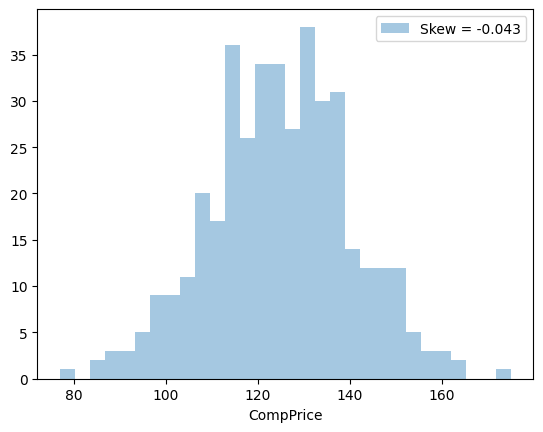

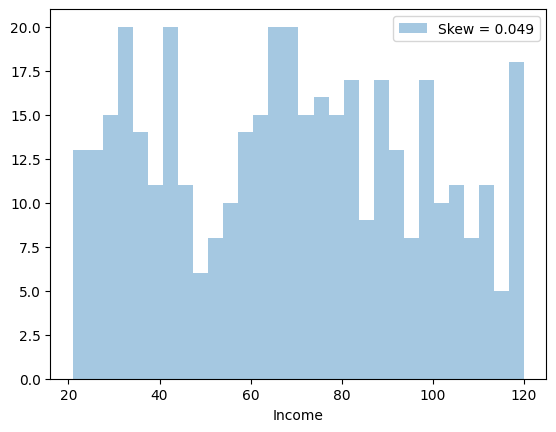

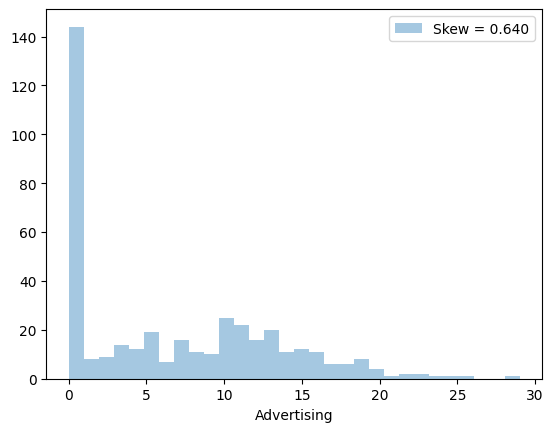

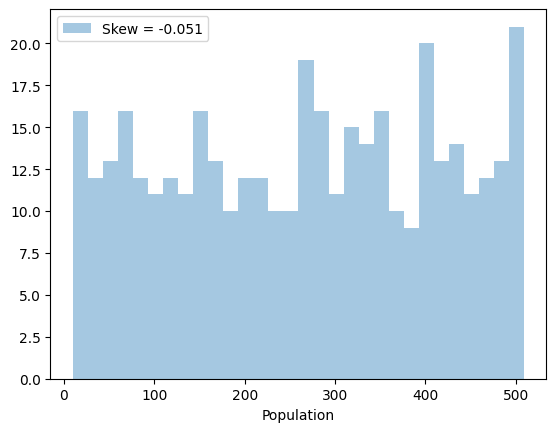

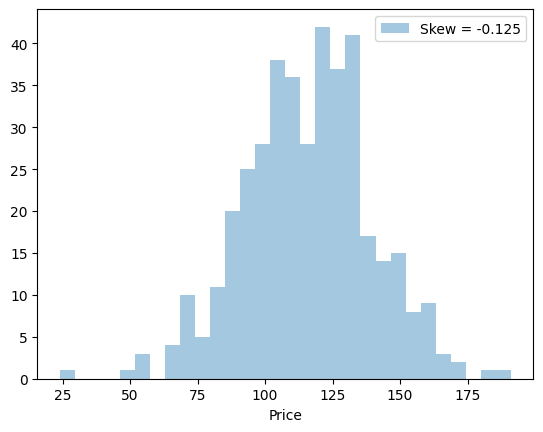

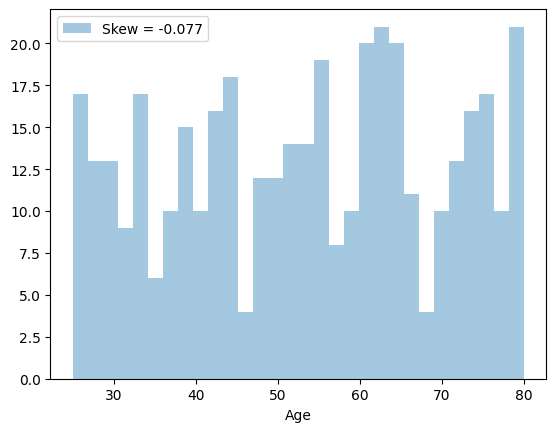

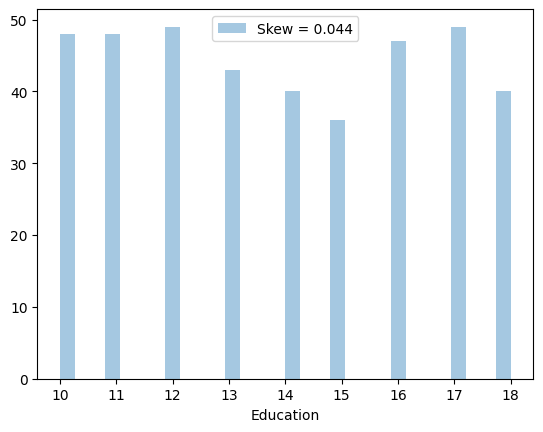

In [33]:
numerical_features = [feature for feature in data1.columns if data1[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data1[feat].skew()
    sns.distplot(data1[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [34]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

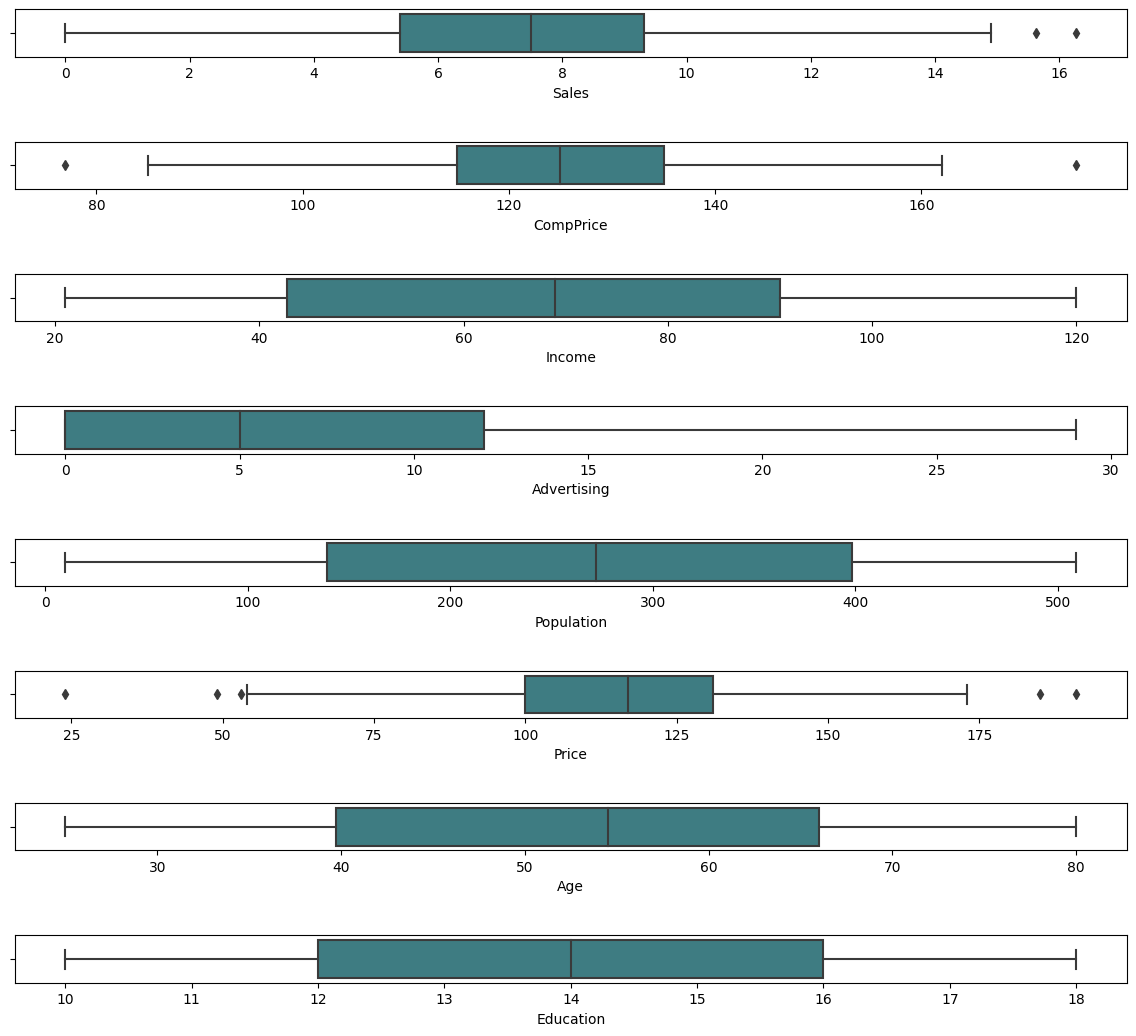

In [35]:
outliers = data.copy() 
fig, axes = plt.subplots(8,1,figsize=(12,11),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=3.0)

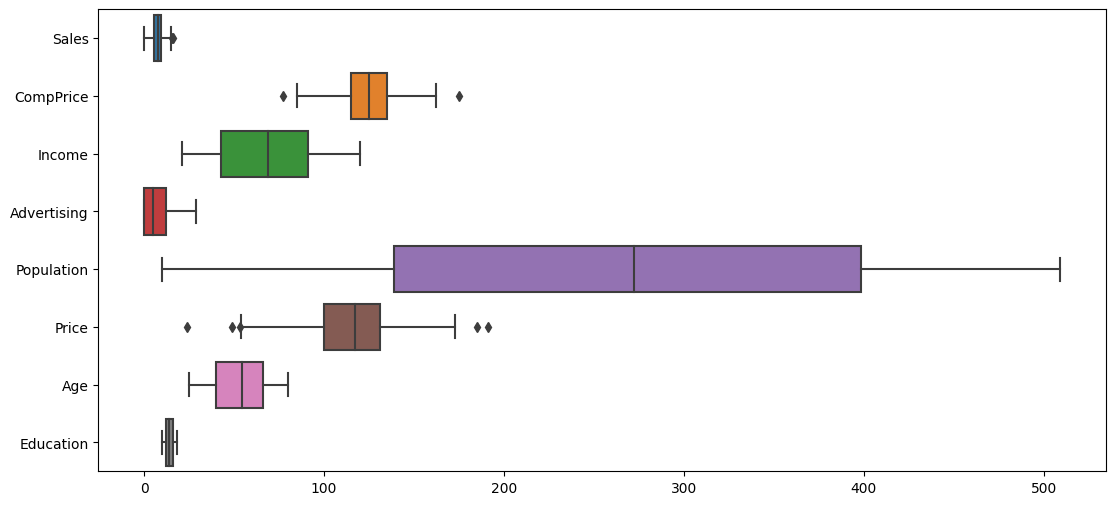

In [36]:
plt.figure(figsize=(13,6))
sns.boxplot(data=data[numerical_features], orient="h")
plt.show()

Multivariate Analysis

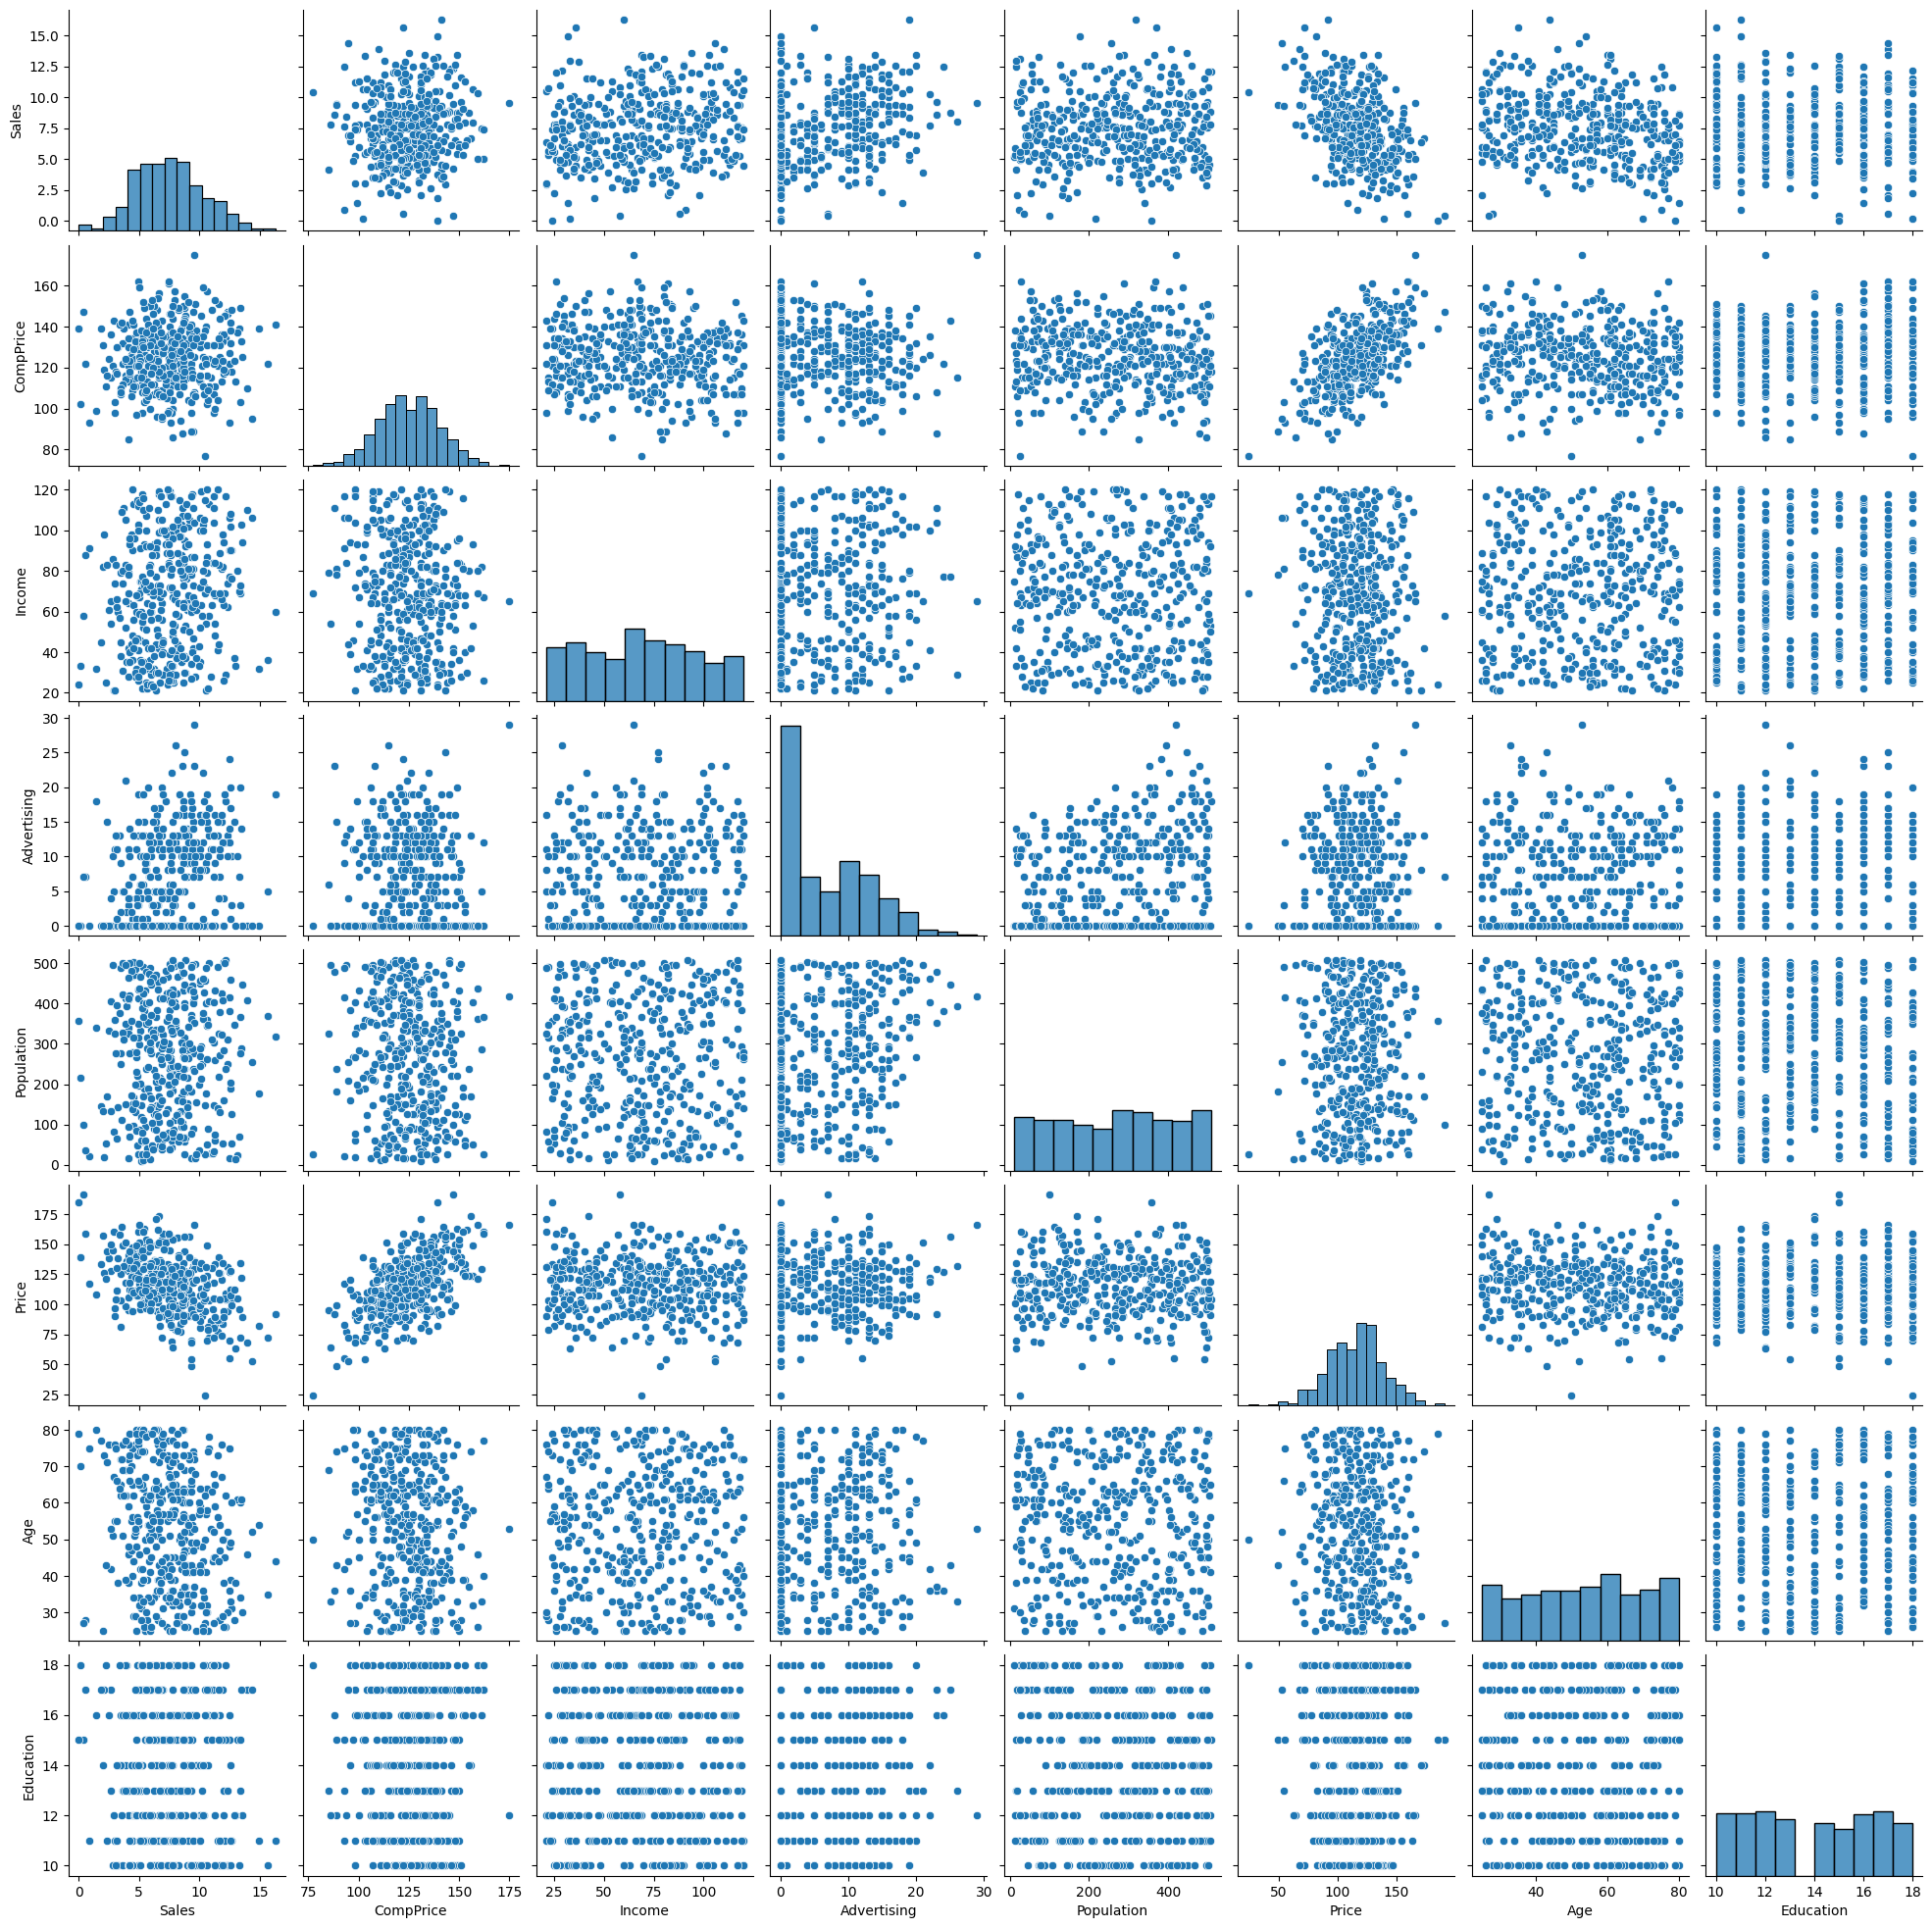

In [38]:
sns.pairplot(data, palette='coolwarm')
plt.show()

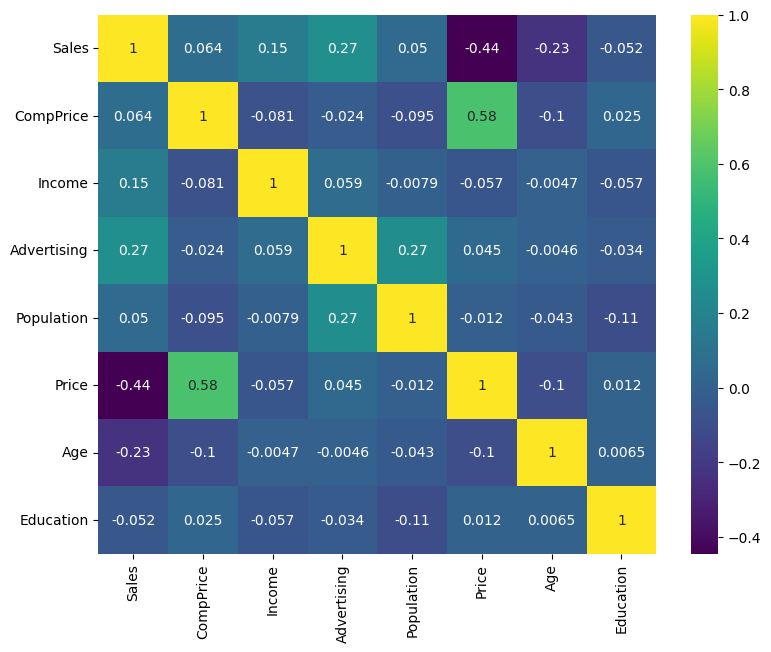

In [39]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

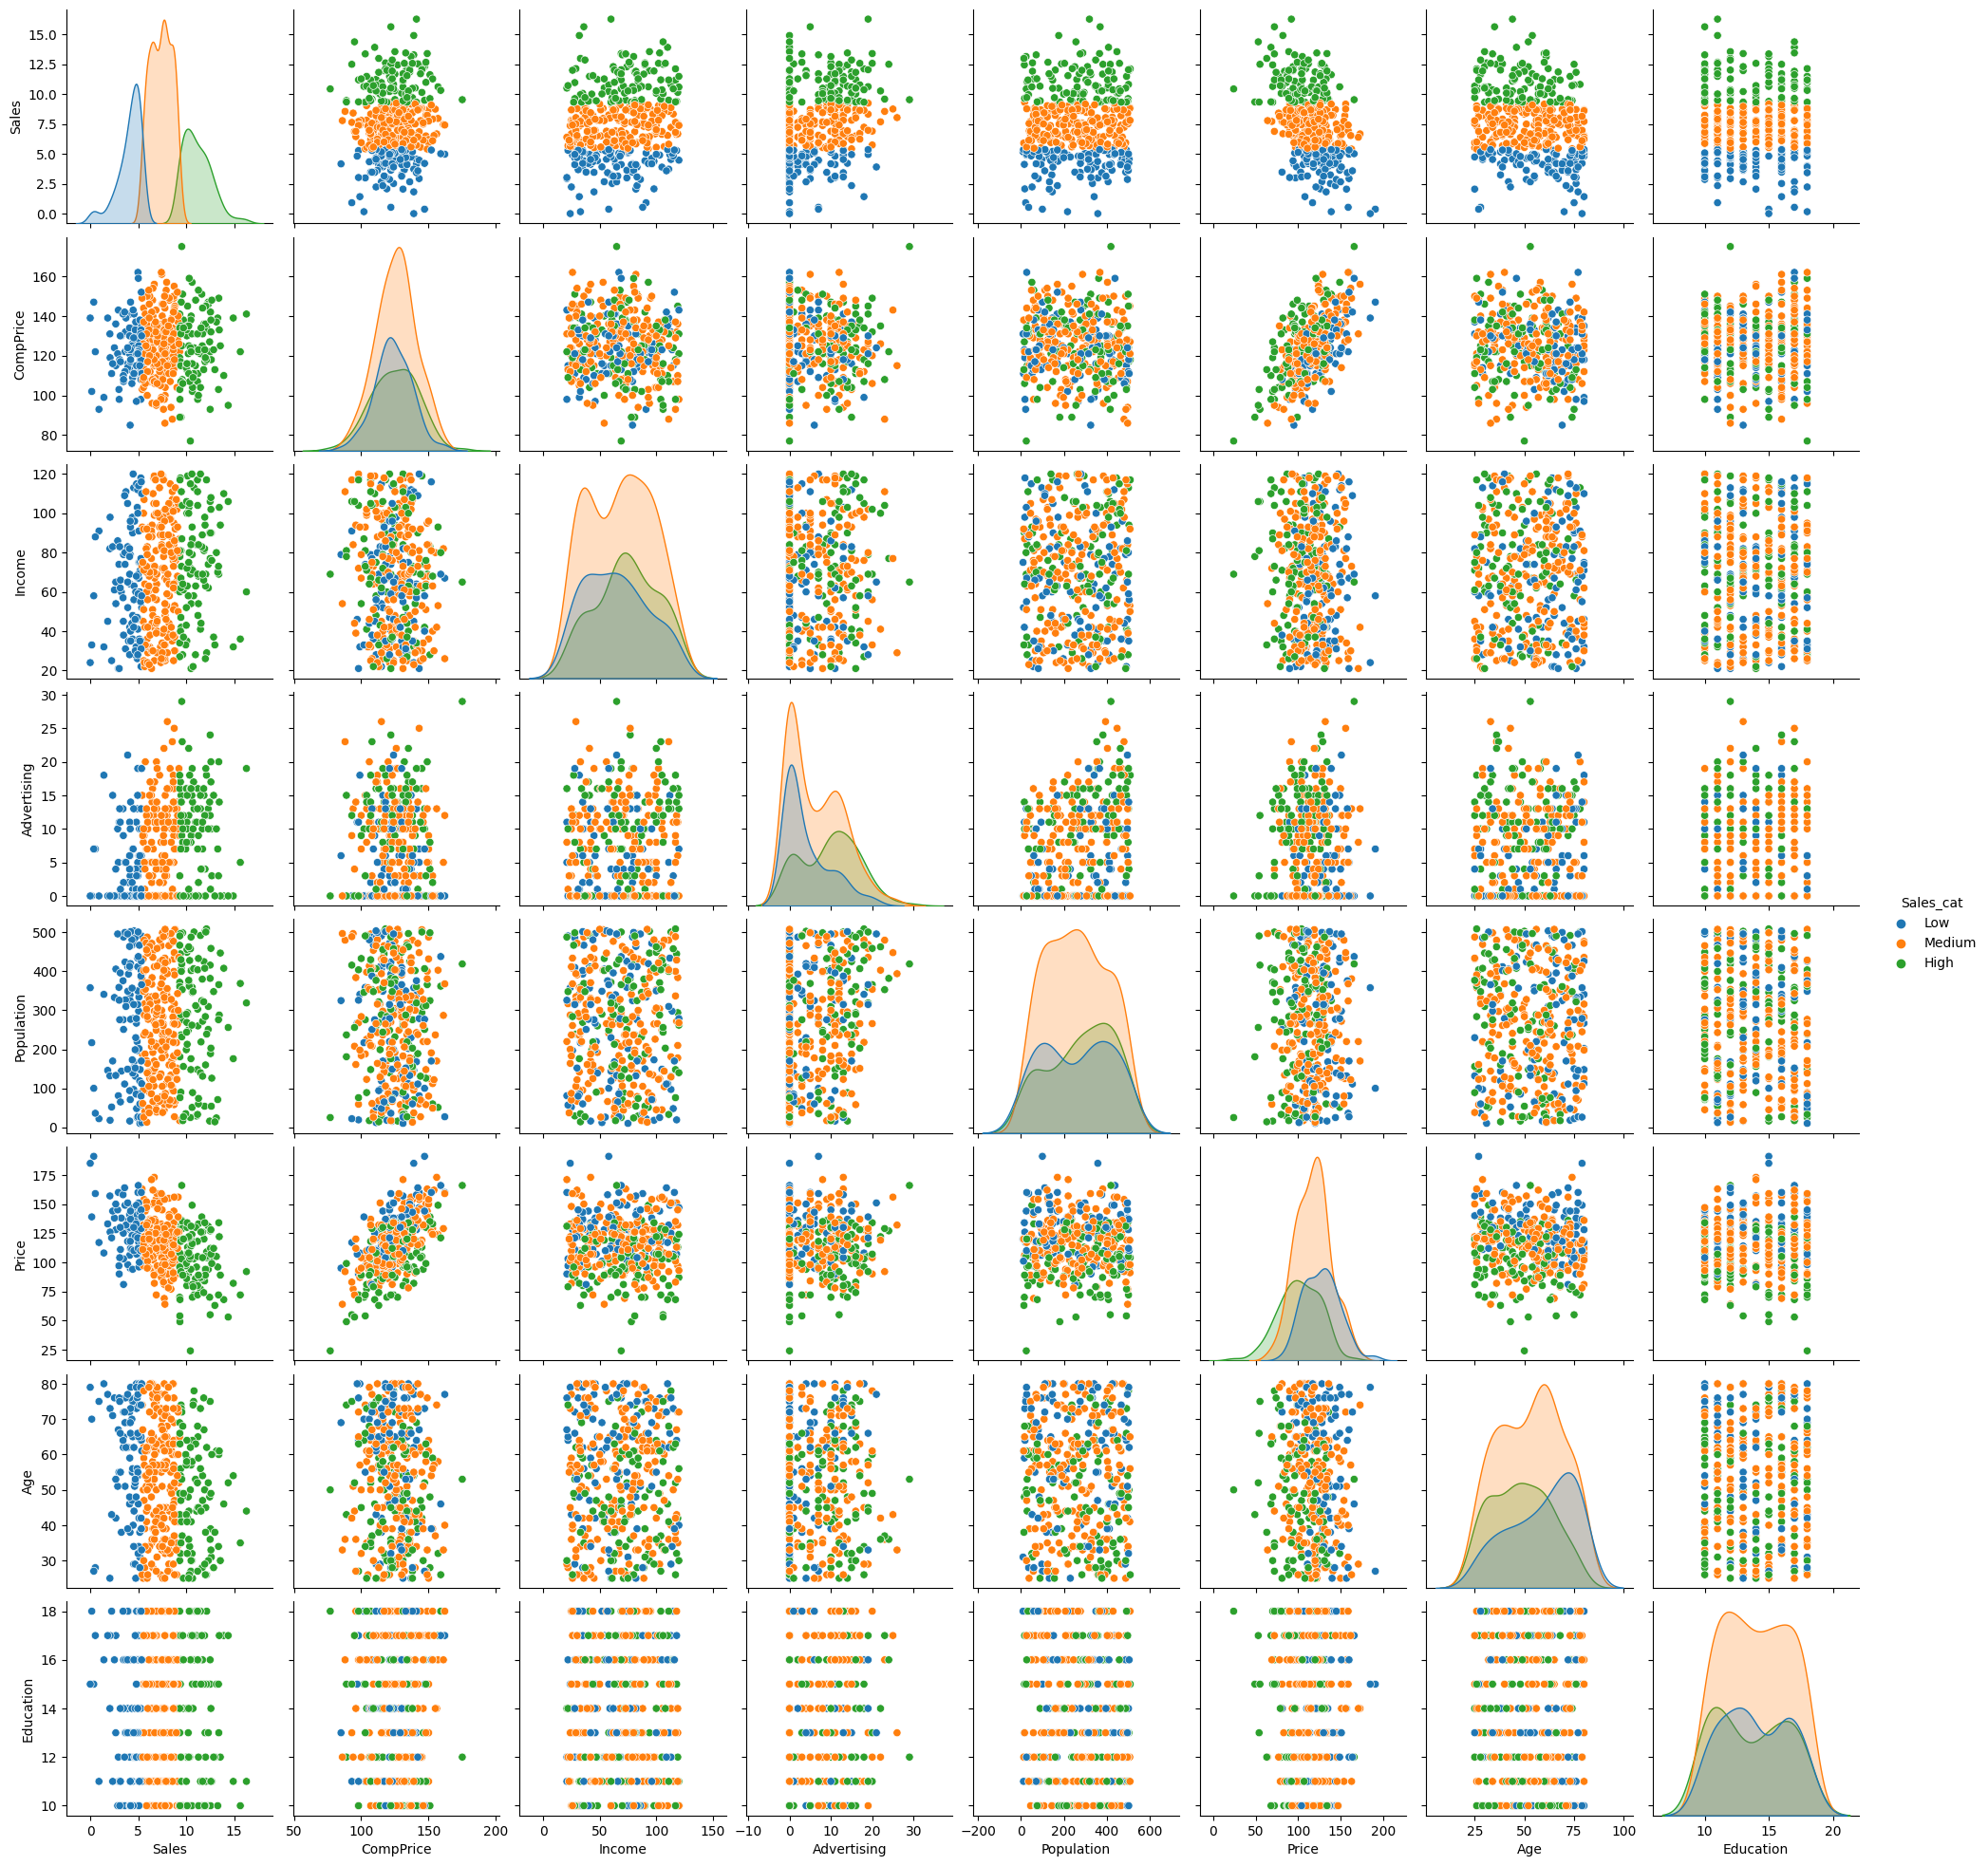

In [45]:
sns.pairplot(data=data, hue = 'Sales_cat')
plt.show()

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


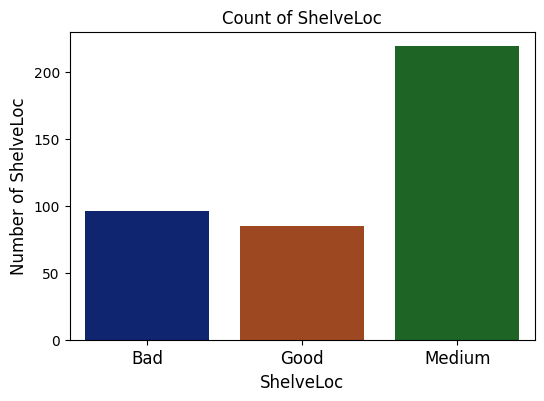

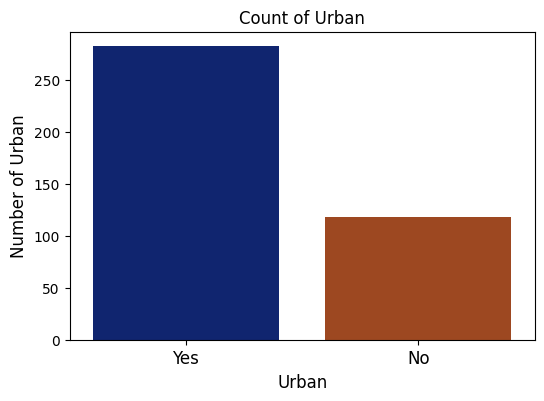

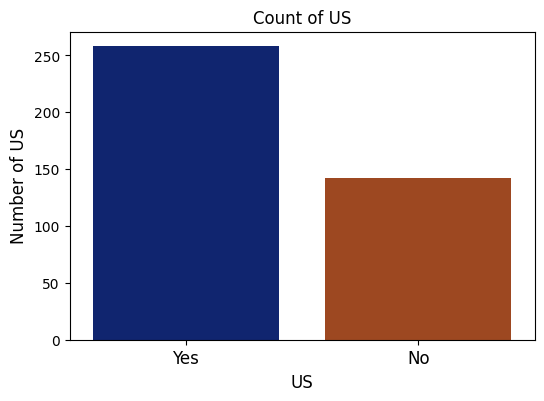

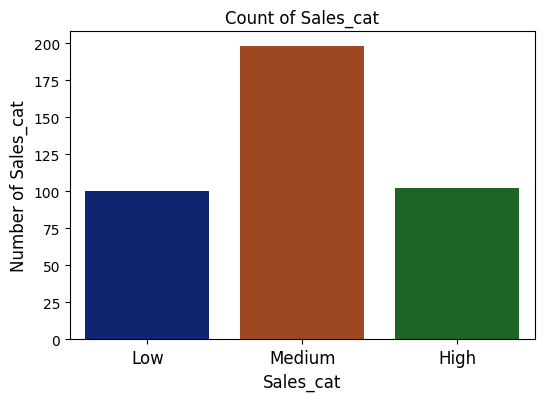

In [44]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = data[column].value_counts(ascending=True);   
    plt.title("Count of "+ column)
    sns.countplot(data= data, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
plt.show()

In [46]:
company_data_dummi = data.copy()
company_data_dummi.drop('Sales',axis=1, inplace =True)
company_data_dummi = pd.get_dummies(company_data_dummi.iloc[:,:-1])
company_data_dummi.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

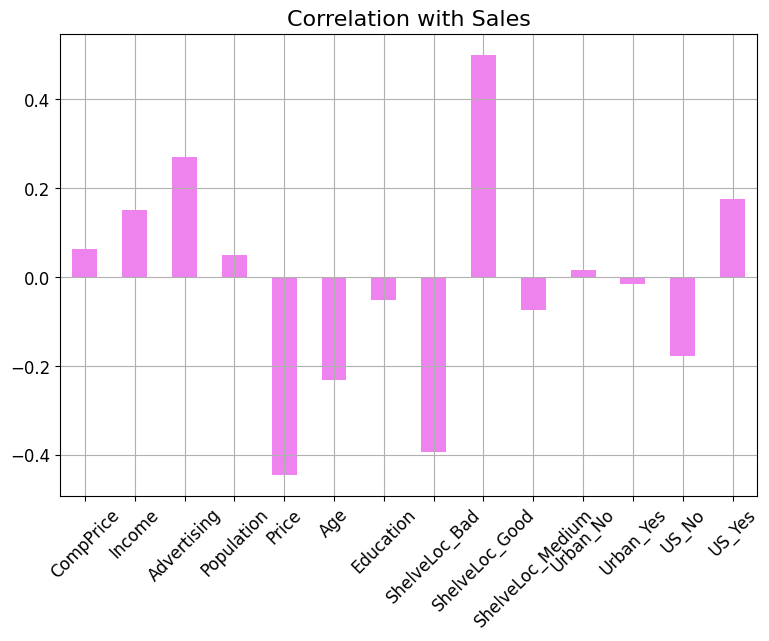

In [49]:
data2 = company_data_dummi.copy()

correlations = data2.corrwith(data.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (9,6), fontsize = 12, color = 'violet', rot = 45, grid = True)
plt.title('Correlation with Sales',fontsize = "16")
plt.show()

In [55]:
data.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

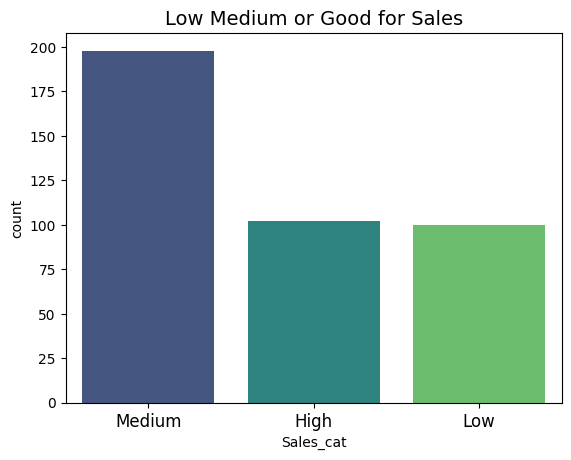

In [56]:
sns.countplot(x= 'Sales_cat', data=data, palette= 'viridis', order=data['Sales_cat'].value_counts().index)
plt.xticks(fontsize= 12)
plt.title('Low Medium or Good for Sales', fontsize= 14)
plt.show()

In [57]:
company_data3 = data1.copy()
company_data3.drop('Sales',axis=1, inplace =True)
company_data3 = pd.get_dummies(company_data3.iloc[:,:-1])
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  
0              1               0                 0         0          1  
1              0               1                 0         0          1  
2              0               0                 1         0          1  
3              0               0                 1         0          1  
4              1               0                 0         0          1

In [58]:
company_data3['Sales']=data.Sales_cat
company_data3.head()


CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

    Sales  
0    High  
1    High  
2    High  
3  Medium  
4     Low

In [59]:
le = LabelEncoder()
le.fit(company_data3["Sales"])
company_data3["Sales"]=le.transform(company_data3["Sales"])
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  Sales  
0              1               0                 0         0          1      0  
1              0               1                 0         0          1      0  
2              0               0                 1         0          1      0  
3              0               0                 1         0          1      2  
4              1               0                 0         0          1      1

In [62]:
#Splitting into x and y variable
x = company_data3.iloc[:, :-1]
y=  company_data3.Sales

In [63]:
#Feature Extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [64]:
#Summarizing Scores
scores = fit.scores_
features = fit.transform(x)

In [65]:
score_company_data = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_company_data.sort_values(by="Score", ascending=False, inplace=True)
score_company_data

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
9     8.654770  ShelveLoc_Medium
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

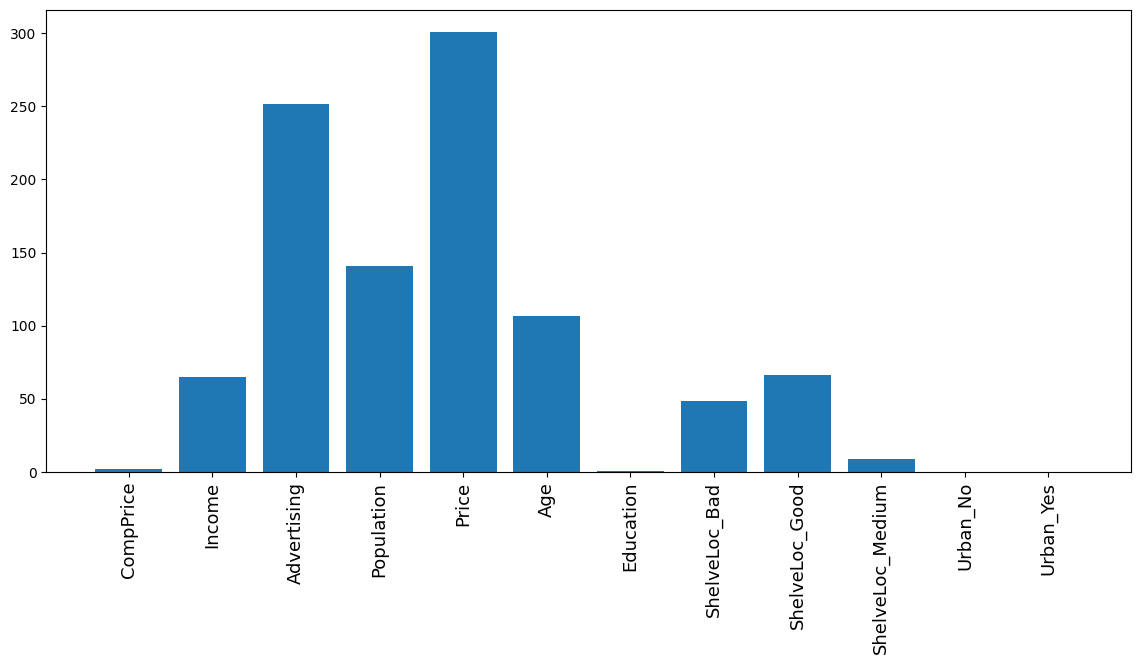

In [73]:
fig, axes = plt.subplots(figsize=(14,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation= 90, size= 13)
plt.show()

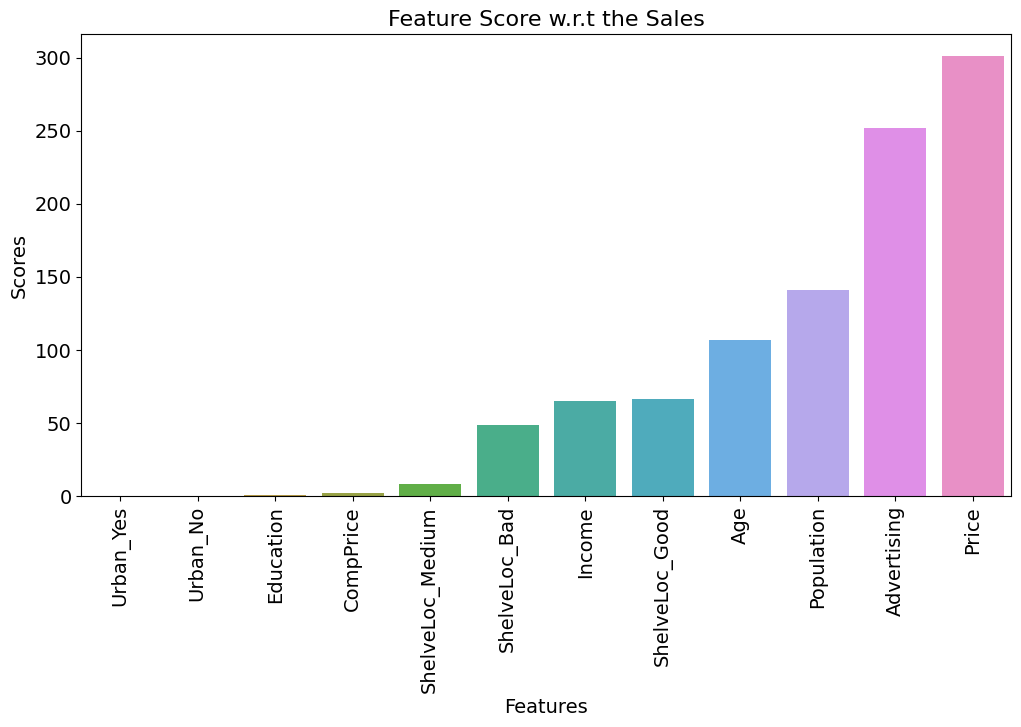

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data= score_company_data, order=score_company_data.sort_values('Score').Feature)
plt.xlabel("Features", size=14)
plt.ylabel("Scores", size=14)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Score w.r.t the Sales", size=16)
plt.show()

In [75]:
model_data = company_data3[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

In [77]:
#StartifiedKFold
x = model_data.drop('Sales',axis=1)
y = model_data[['Sales']]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))


>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40
>Train: 0=360, 1=360, Test: 0=40, 1=40


In [78]:
#Test Train Split With Imbalanced Dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)


In [79]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))


>Train: 0=320, 1=320, Test: 0=80, 1=80


In [80]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({'Sales': 1}) Testing Data Counter({'Sales': 1})


In [81]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (320, 8)
Shape of x_test  :  (80, 8)
Shape of y_train :  (320, 1)
Shape of y_test  :  (80, 1)


Model Training And Testing

Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [82]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":(list(range(1,10))), 
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}

tree_clf = DecisionTreeClassifier(random_state=10)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_x, train_y)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=True)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 75.83%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.778947   0.766234    0.744681  0.758333    0.763287   
recall      0.804348   0.655556    0.786517  0.758333    0.748807   
f1-score    0.791444   0.706587    0.765027  0.758333    0.754353   
support    92.000000  90.000000  178.000000  0.758333  360.000000   

           weighted avg  
precision      0.758826  
recall         0.758333  
f1-score       0.757168  
support      360.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 74   0  18]
 [  1  59  30]
 [ 20  18 140]]

Test Result:
Accuracy Score: 55.00%
_________________________

In [84]:
#Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf1 = StratifiedKFold(n_splits=15, shuffle=True, random_state=15)
results = cross_val_score(decision_tree, train_x, train_y, cv=skf1)
print(results.mean())

0.6166666666666667


In [85]:
params1 = {"criterion":["gini","entropy"],"max_depth":range(1,10),
              "min_samples_split":range(1,10),"min_samples_leaf":range(1,10)}

grid = GridSearchCV(decision_tree, param_grid = params1, cv=skf1, verbose=1, n_jobs=6)
grid.fit(train_x,train_y)
model1 = grid.best_estimator_

Fitting 15 folds for each of 1458 candidates, totalling 21870 fits


In [86]:
grid.best_score_

0.6888888888888887

In [87]:
predict_output1 = model1.predict(test_x)
accuracy_test1 = accuracy_score(test_y,predict_output1)
accuracy_test1


0.625

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.56      0.50      0.53        10
           2       0.62      0.75      0.68        20

    accuracy                           0.62        40
   macro avg       0.63      0.58      0.60        40
weighted avg       0.63      0.62      0.62        40



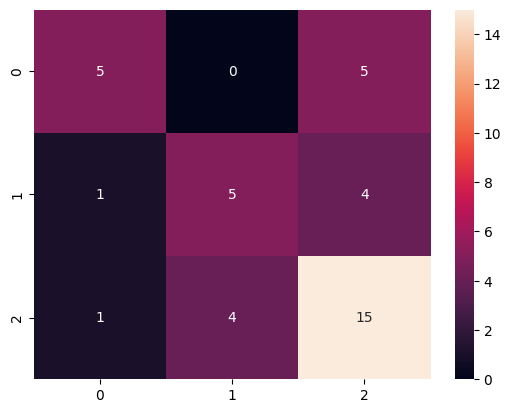

In [88]:
sns.heatmap(confusion_matrix(test_y, predict_output1),annot=True)
print(classification_report(test_y,predict_output1))

In [89]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":(list(range(1,10))), 
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}

tree_clf = DecisionTreeClassifier(random_state= 12)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 67.81%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.836364   0.700000    0.632558  0.678125    0.722974   
recall      0.560976   0.437500    0.860759  0.678125    0.619745   
f1-score    0.671533   0.538462    0.729223  0.678125    0.646406   
support    82.000000  80.000000  158.000000  0.678125  320.000000   

           weighted avg  
precision      0.701644  
recall         0.678125  
f1-score       0.666749  
support      320.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 46   2  34]
 [  0  35  45]
 [  9  13 136]]

Test Result:
Accuracy Score: 72.50%
____________________

In [90]:
decision_tree = DecisionTreeClassifier()
skf2 = StratifiedKFold(n_splits=15, shuffle=True, random_state=20)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf2)
print(results.mean())

0.5753246753246752


In [91]:
params2 = {"criterion":["gini","entropy"], "max_depth":range(1,10),
              "min_samples_split":range(1,10), "min_samples_leaf":range(1,10)}

grid = GridSearchCV(decision_tree, param_grid= params2, cv=skf2, verbose=1, n_jobs=6)
grid.fit(x_train,y_train)
model2 = grid.best_estimator_

Fitting 15 folds for each of 1458 candidates, totalling 21870 fits


In [92]:
grid.best_score_

0.6836940836940836

In [93]:
predict_output2 = model2.predict(x_test)
accuracy_test2 = accuracy_score(y_test,predict_output2)
accuracy_test2

0.65

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.58      0.55      0.56        20
           2       0.66      0.62      0.64        40

    accuracy                           0.65        80
   macro avg       0.64      0.66      0.65        80
weighted avg       0.65      0.65      0.65        80



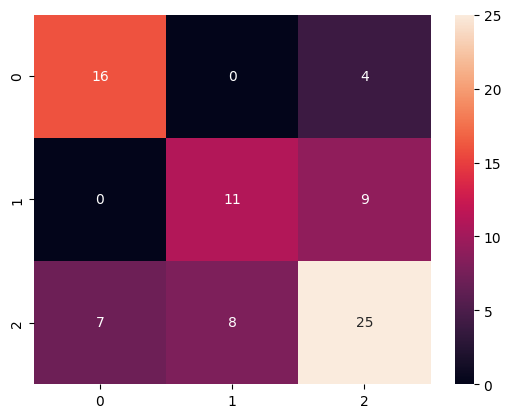

In [94]:
sns.heatmap(confusion_matrix(y_test, predict_output2),annot=True)
print(classification_report(y_test,predict_output2))

in both situation,due to presece of imbalance data the model is getting biased and fail to claassify minority classes.we should balance the data by oversampling techniques.

Pruning

In [96]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), "max_depth":(list(range(1,10))), 
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1,10))}


tree_clf = DecisionTreeClassifier(random_state= 21)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 82.19%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.819277   0.814815    0.826923  0.821875    0.820338   
recall      0.829268   0.825000    0.816456  0.821875    0.823575   
f1-score    0.824242   0.819876    0.821656  0.821875    0.821925   
support    82.000000  80.000000  158.000000  0.821875  320.000000   

           weighted avg  
precision      0.821937  
recall         0.821875  
f1-score       0.821874  
support      320.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 68   1  13]
 [  0  66  14]
 [ 15  14 129]]

Test Result:
Accuracy Score: 67.50%
_____________________

This is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting 

In [97]:
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6)

In [98]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [99]:
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.822
Testing Accuracy  : 0.675


**Building Decision Tree Classifier **

In [100]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state= 13)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=13)

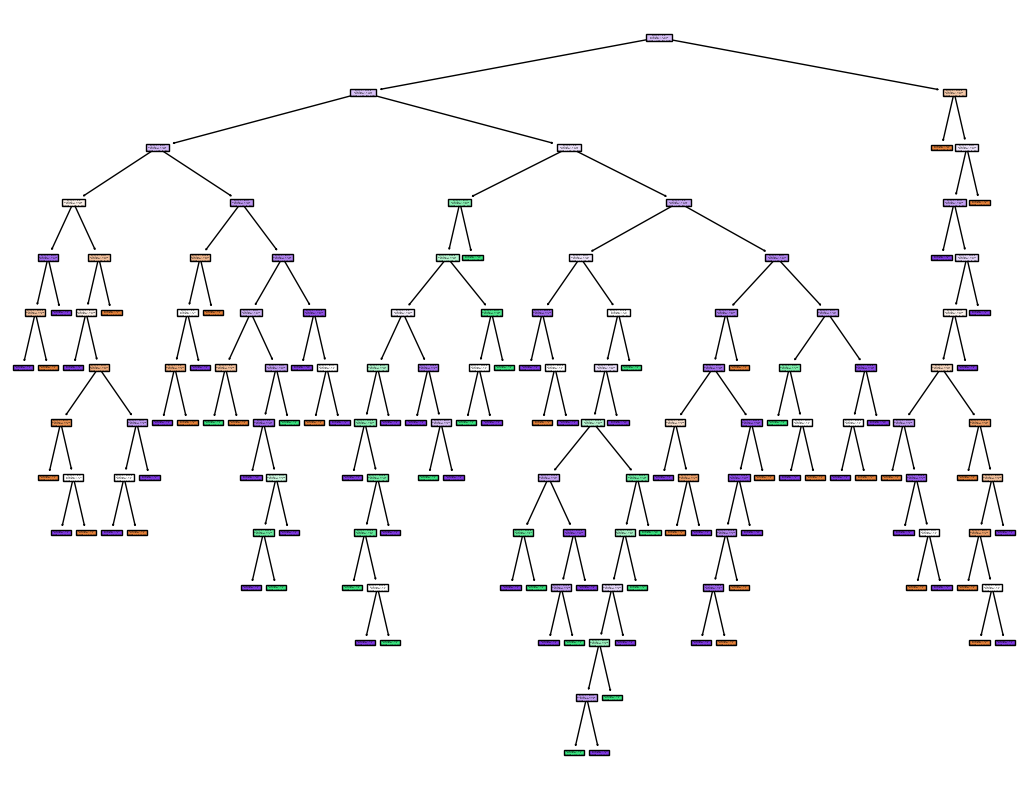

In [101]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [102]:
preds = model_entropy.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

2    46
0    20
1    14
dtype: int64

In [103]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.57      0.40      0.47        20
           2       0.65      0.75      0.70        40

    accuracy                           0.66        80
   macro avg       0.66      0.63      0.64        80
weighted avg       0.66      0.66      0.65        80



In [104]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [105]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=10, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 3 with ccp_alpha: 0.17009894607233478


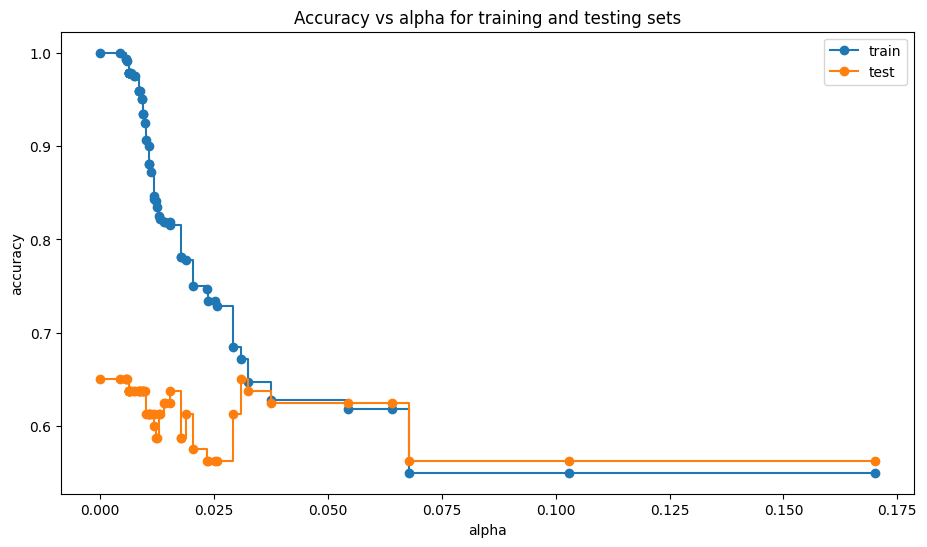

In [106]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [107]:
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=122, ccp_alpha= 0.170098)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.170098, criterion='entropy',
                       random_state=122)

In [108]:
pred_train1 = clf1.predict(x_train)
pred_test1 = clf1.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3),'\n'
      'Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.822 
Testing Accuracy  : 0.675


              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.00      0.00      0.00        20
           2       0.56      0.82      0.67        40

    accuracy                           0.56        80
   macro avg       0.38      0.47      0.42        80
weighted avg       0.42      0.56      0.48        80



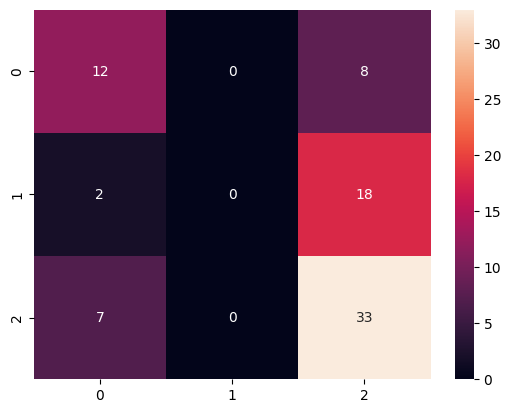

In [109]:
sns.heatmap(confusion_matrix(y_test, pred_test1),annot=True)
print(classification_report(y_test,pred_test1))

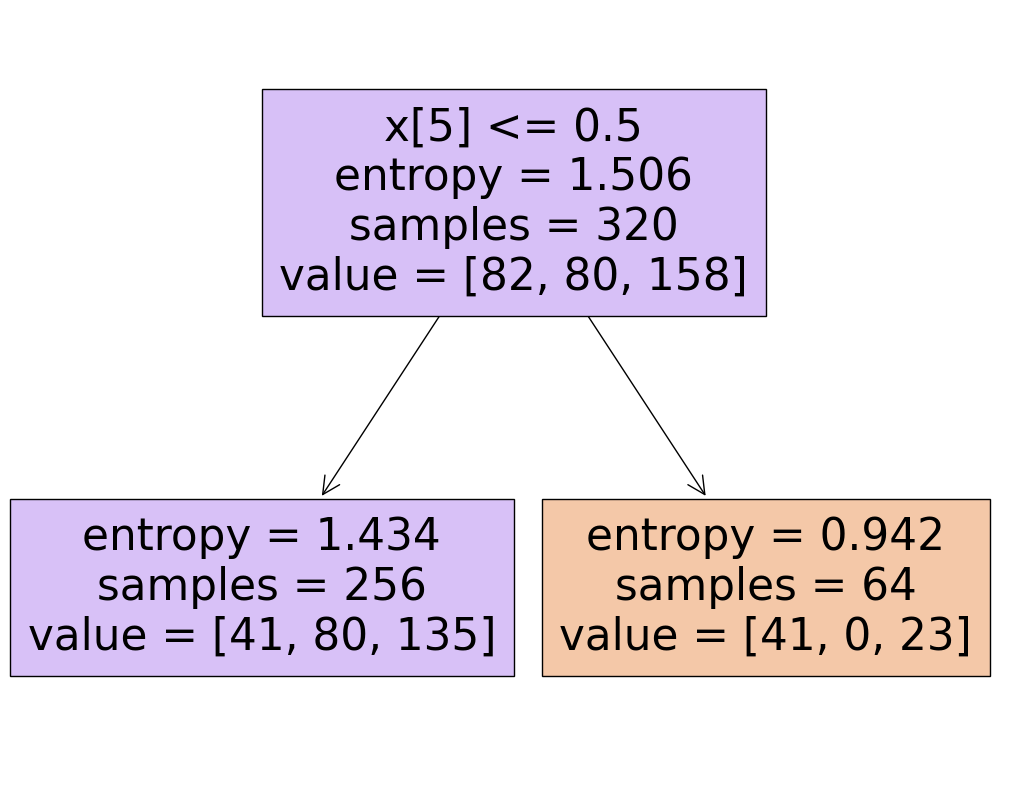

In [110]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf1,filled=True)
plt.show()


In [111]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=11)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

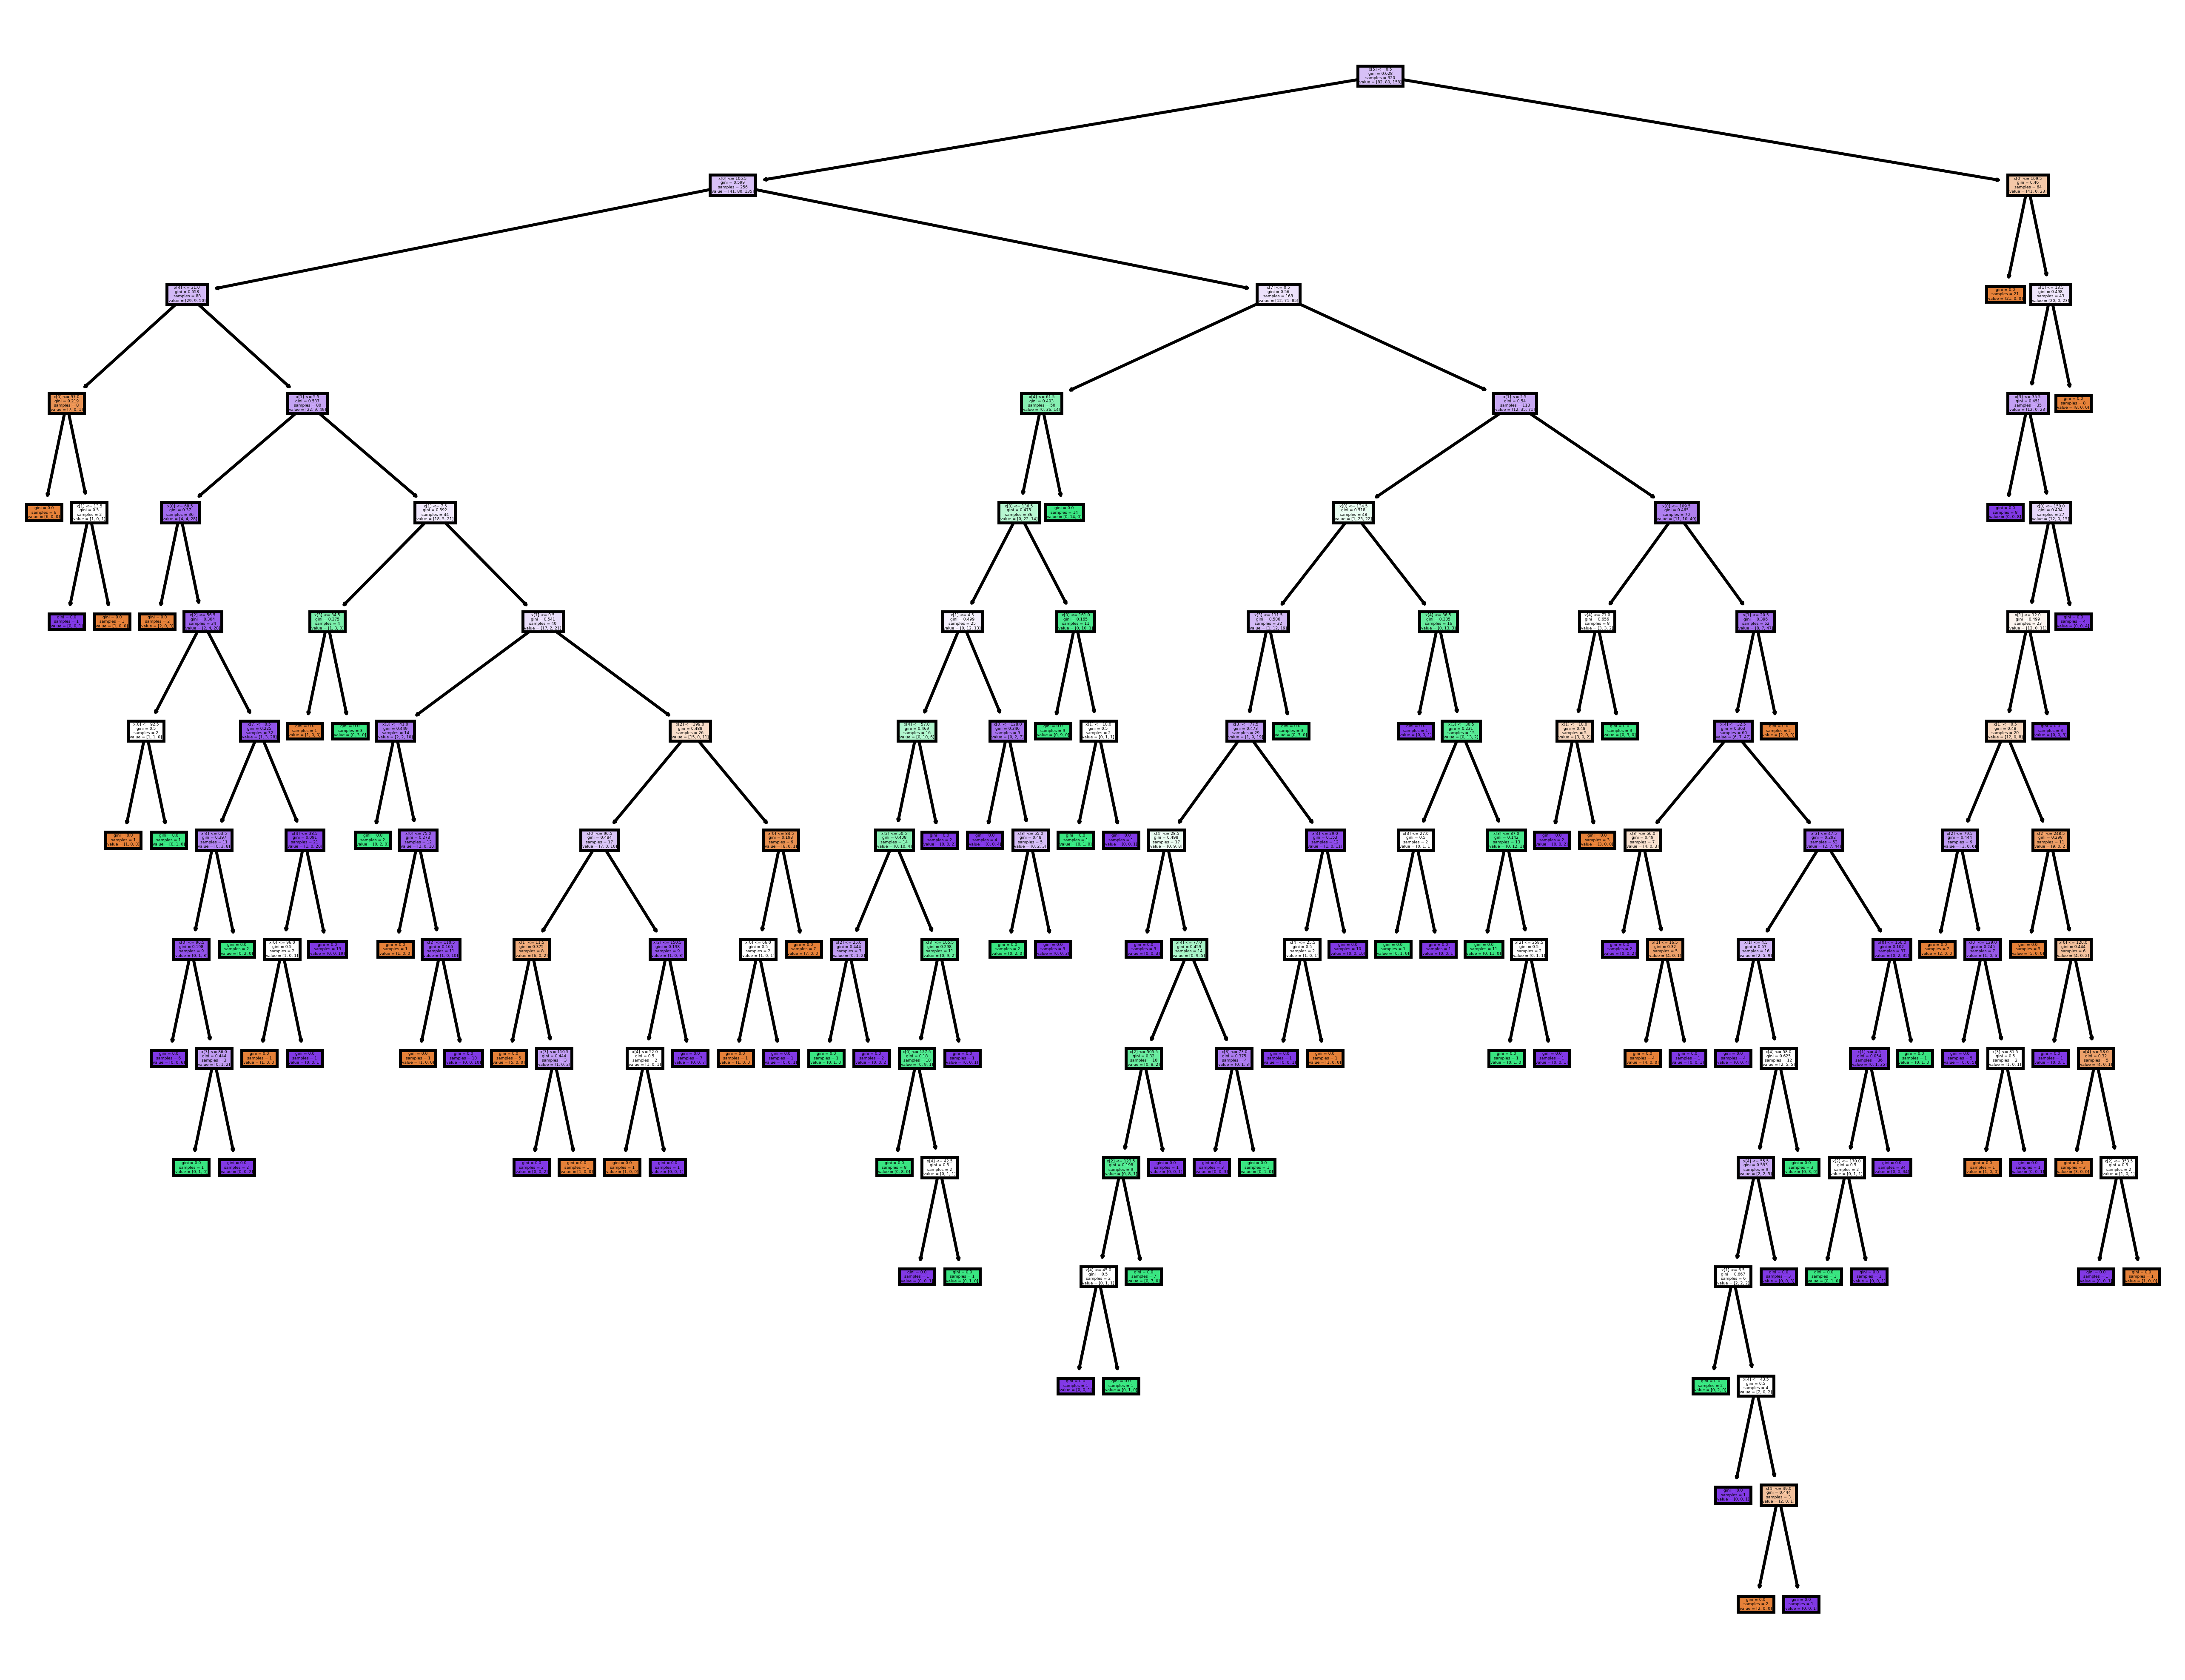

In [112]:
plt.figure(figsize=(13,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [113]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

2    44
0    20
1    16
dtype: int64

In [114]:
#Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.56      0.45      0.50        20
           2       0.64      0.70      0.67        40

    accuracy                           0.64        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.64      0.63        80



In [115]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=20, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.05707519531250005


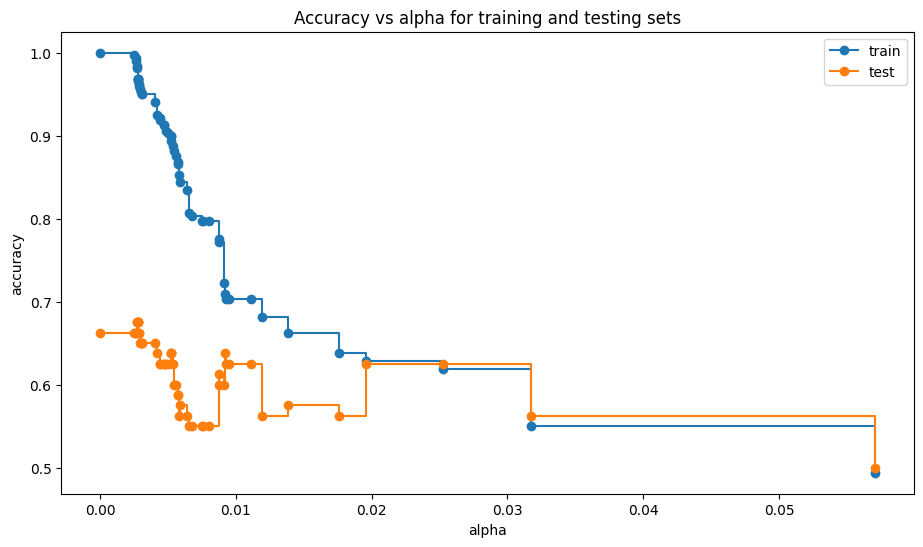

In [116]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [117]:
clf2 = DecisionTreeClassifier(criterion='gini',random_state=125, ccp_alpha= 0.057075)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.057075, random_state=125)

In [118]:
pred_train2 = clf2.predict(x_train)
pred_test2 = clf2.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3),'\n'
      'Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.822 
Testing Accuracy  : 0.675


              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.00      0.00      0.00        20
           2       0.56      0.82      0.67        40

    accuracy                           0.56        80
   macro avg       0.38      0.47      0.42        80
weighted avg       0.42      0.56      0.48        80



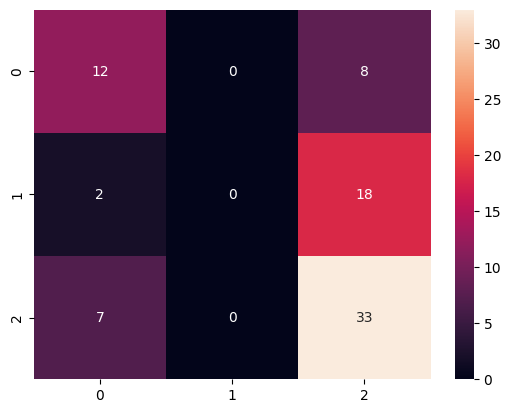

In [119]:
sns.heatmap(confusion_matrix(y_test, pred_test2),annot=True)
print(classification_report(y_test,pred_test2))

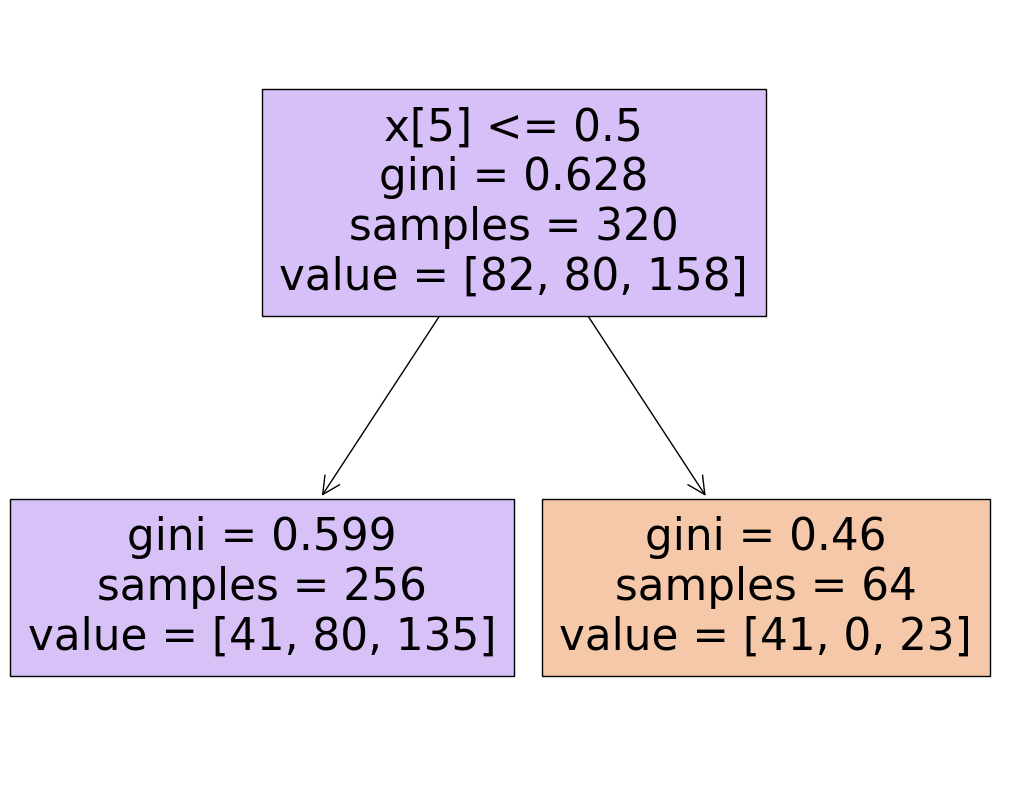

In [120]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf2,filled=True)
plt.show()

**Model Evaluation**

In [121]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test) * 100:.2f}%")

Training Accuracy: 82.19%
Testing Accuracy : 67.50%


In [122]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train1) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test1) * 100:.2f}%")

Training Accuracy: 55.00%
Testing Accuracy : 56.25%


In [123]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train2) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test2) * 100:.2f}%")

Training Accuracy: 55.00%
Testing Accuracy : 56.25%


In [124]:
from pickle import dump
dump(tree_clf,open('company_data_intell.pkl','wb'))

#Q.No 2 Fraud Check

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold,StratifiedKFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [126]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [127]:
fraud= pd.read_csv('Fraud_check (1).csv')

In [128]:
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [129]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [130]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [131]:
fraud.shape

(600, 6)

In [132]:
fraud.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [133]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [135]:
fraud[fraud.duplicated()].shape

(0, 6)

In [136]:
Fraud_new = fraud.copy()
Fraud_new['Taxabale.Category']=pd.cut(x=Fraud_new['Taxable.Income'],bins=[10002,30000,99620],labels = ['Risky','Good'])
Fraud_new.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban Taxabale.Category  
0   YES              Good  
1   YES              Good  
2   YES              Good  
3   YES              Good  
4    NO              Good

In [137]:
Categorical_Features = fraud.describe(include=["object"]).columns
Categorical_Features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [138]:
Numerical_Features = fraud.describe(include=["int64"]).columns
Numerical_Features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

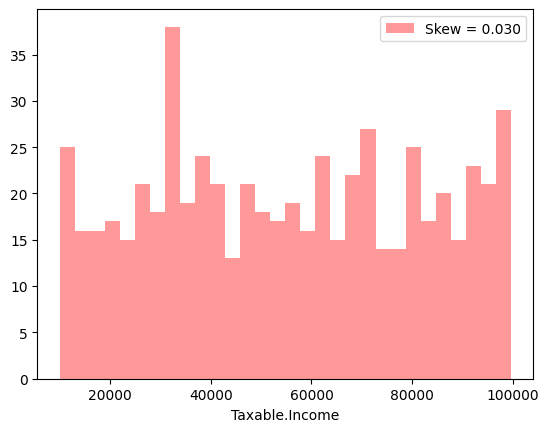

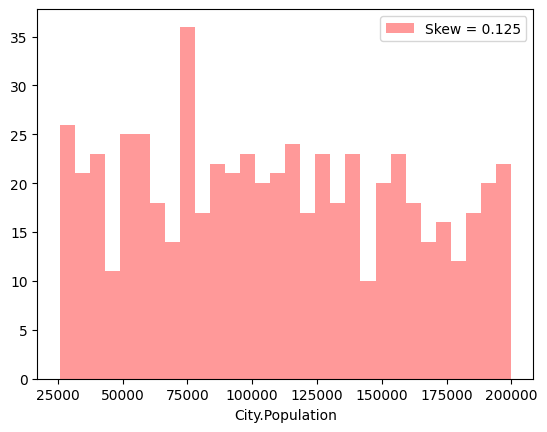

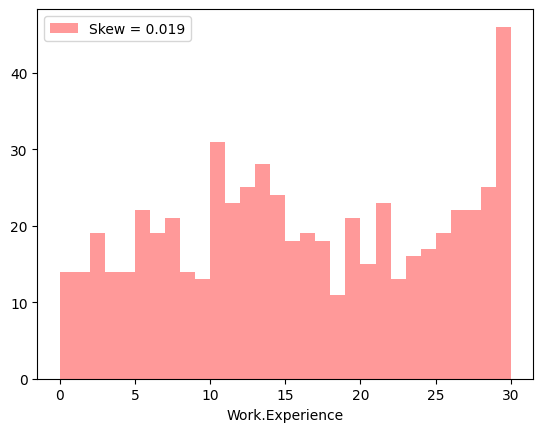

In [142]:
Numerical_Features = [feature for feature in fraud.columns if fraud[feature].dtypes !='O']
for feat in Numerical_Features:
    skew = fraud[feat].skew()
    sns.distplot(fraud[feat],kde =False, label ='Skew = %.3f' %(skew),bins=30,color='red')
    plt.legend(loc='best')
    plt.show()

In [143]:
#finding Outliers
Numerical_Features

['Taxable.Income', 'City.Population', 'Work.Experience']

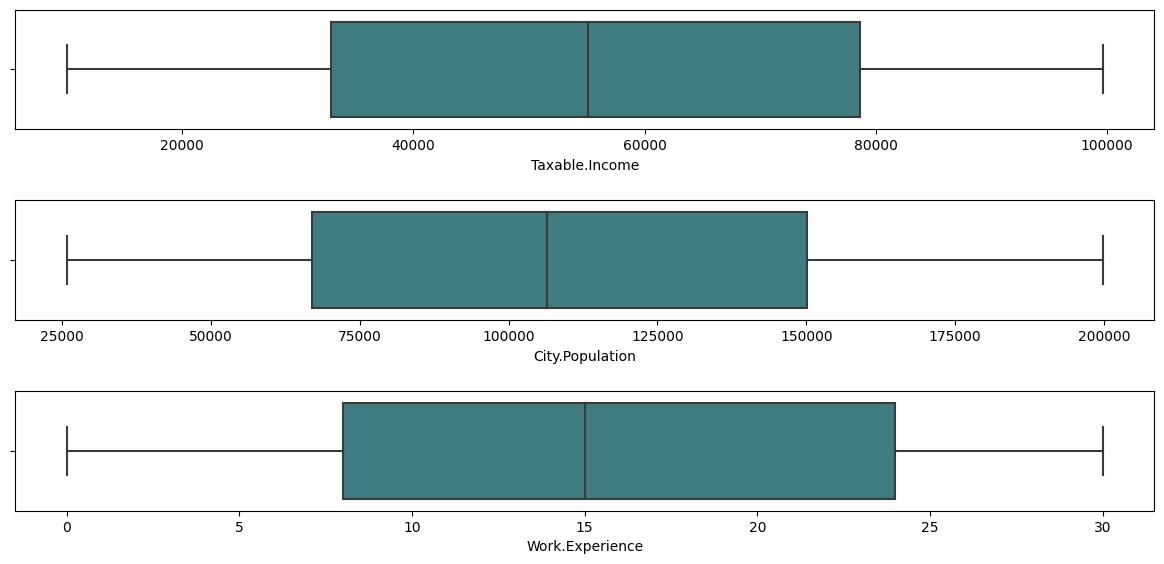

In [144]:
Outlier = fraud.copy() 
fig, axes = plt.subplots(3,1,figsize=(12,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data= Outlier,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data= Outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data= Outlier,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

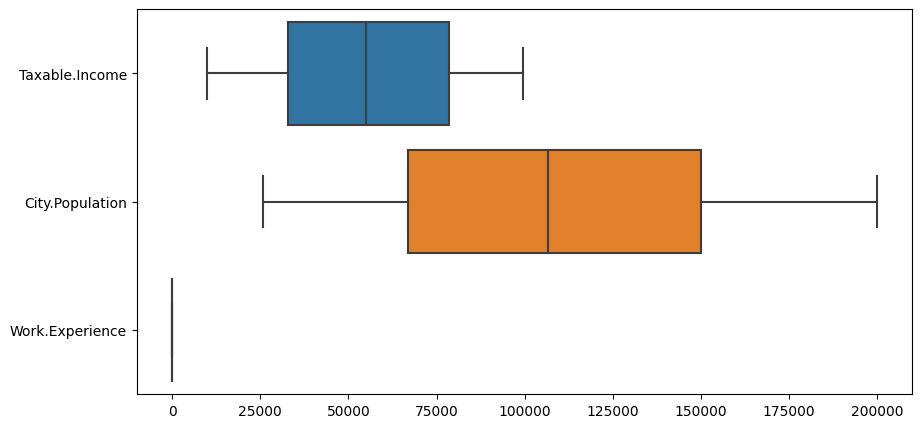

In [146]:
plt.figure(figsize=(10,5))
sns.boxplot(data= fraud[Numerical_Features], orient="h")
plt.show()

**Multivariate Analysis**

In [147]:
fraud.corr()

Taxable.Income  City.Population  Work.Experience
Taxable.Income         1.000000        -0.064387        -0.001818
City.Population       -0.064387         1.000000         0.013135
Work.Experience       -0.001818         0.013135         1.000000

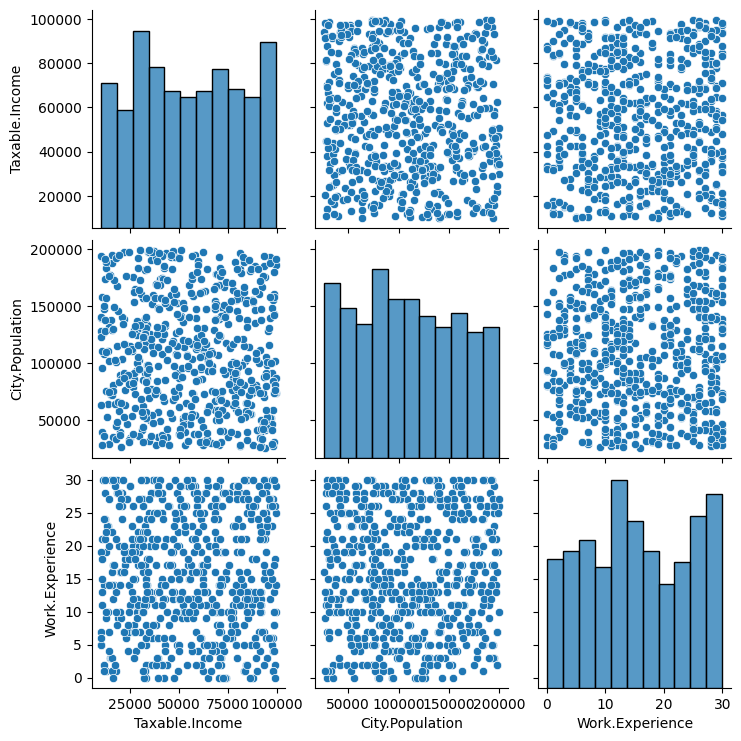

In [148]:
sns.pairplot(fraud, palette='coolwarm')
plt.show()

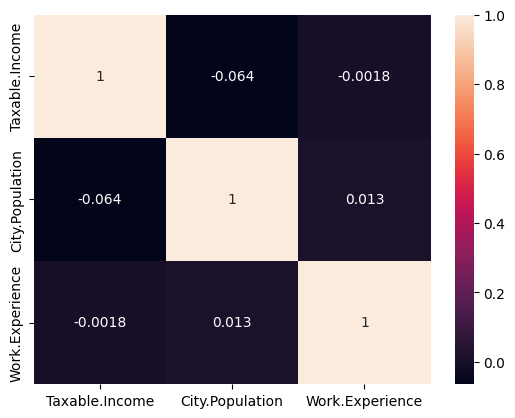

In [149]:
sns.heatmap(fraud.corr(), annot=True)
plt.show()

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


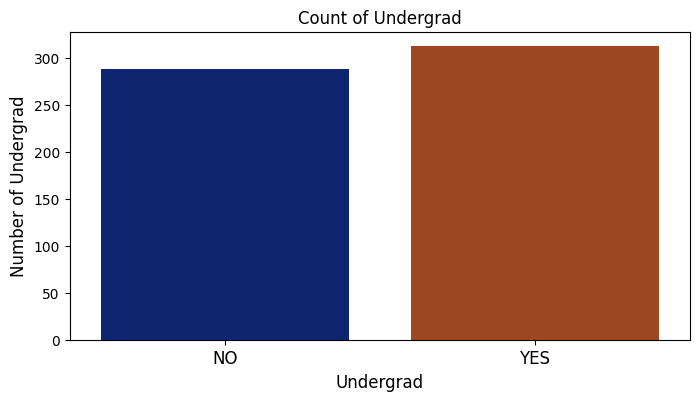

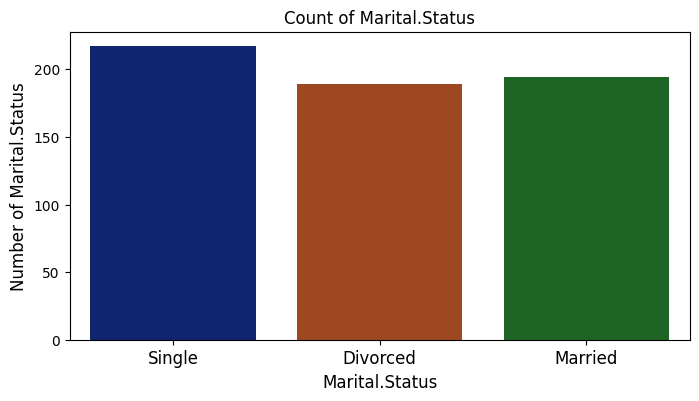

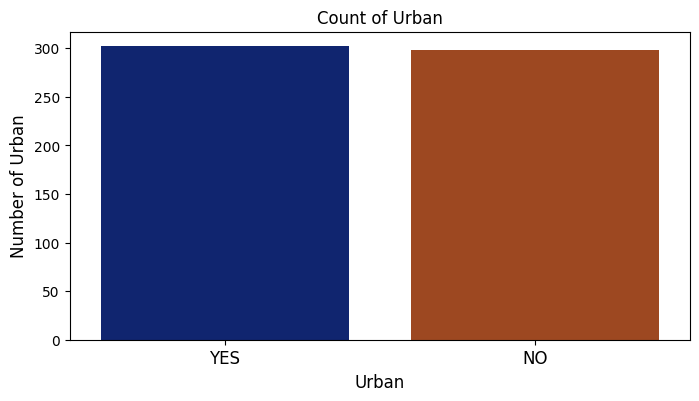

In [150]:
print(Categorical_Features)

for idx, column in enumerate(Categorical_Features):
    plt.figure(figsize=(8,4))
    unique = fraud[column].value_counts(ascending=True);
   
    plt.title("Count of "+ column)
    sns.countplot(data= fraud, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

In [151]:
def factorplot(param):
    sns.factorplot(x = param, size = 5, aspect = 2, data = fraud_check, y= "Taxable.Income", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

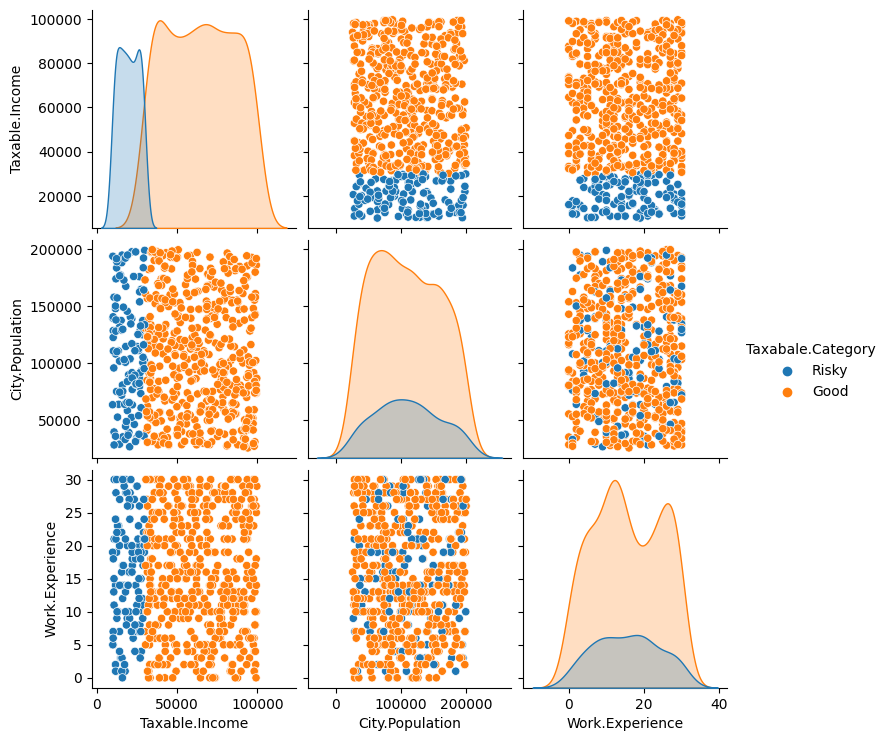

In [155]:
sns.pairplot(data= Fraud_new, hue = 'Taxabale.Category')
plt.show()

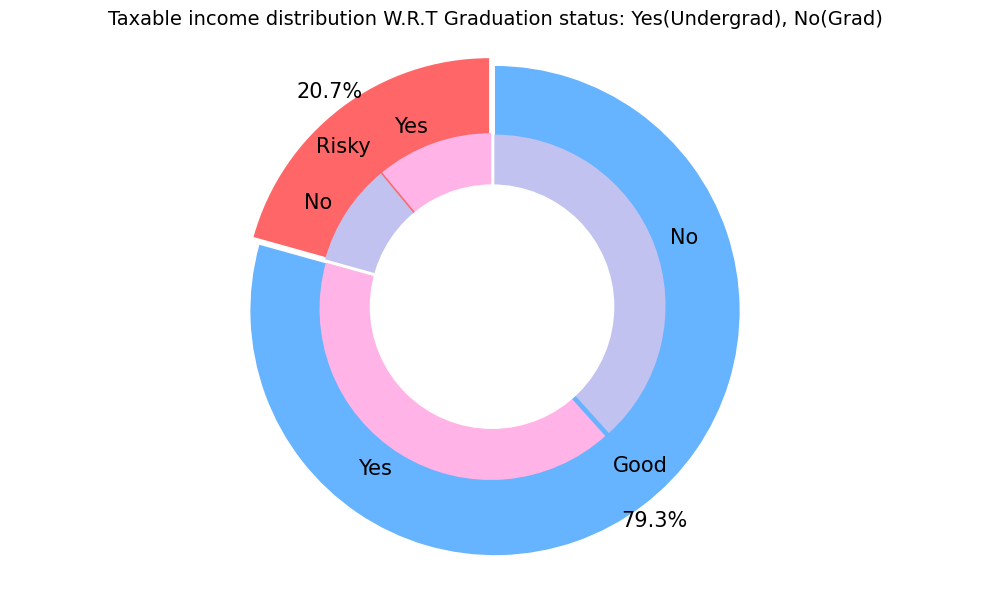

In [158]:
plt.figure(figsize=(10,6))
labels =["Risky", "Good"]
values = [Fraud_new["Taxabale.Category"][Fraud_new["Taxabale.Category"] == 'Risky'].groupby(by = Fraud_new.Undergrad).count().sum(),
         Fraud_new["Taxabale.Category"][Fraud_new["Taxabale.Category"] == 'Good'].groupby(by = Fraud_new.Undergrad).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [66,58 , 246,230]
colors = ['#ff6667', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15, 'rotation':'horizontal'}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution W.R.T Graduation status: Yes(Undergrad), No(Grad)', fontsize= 14)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

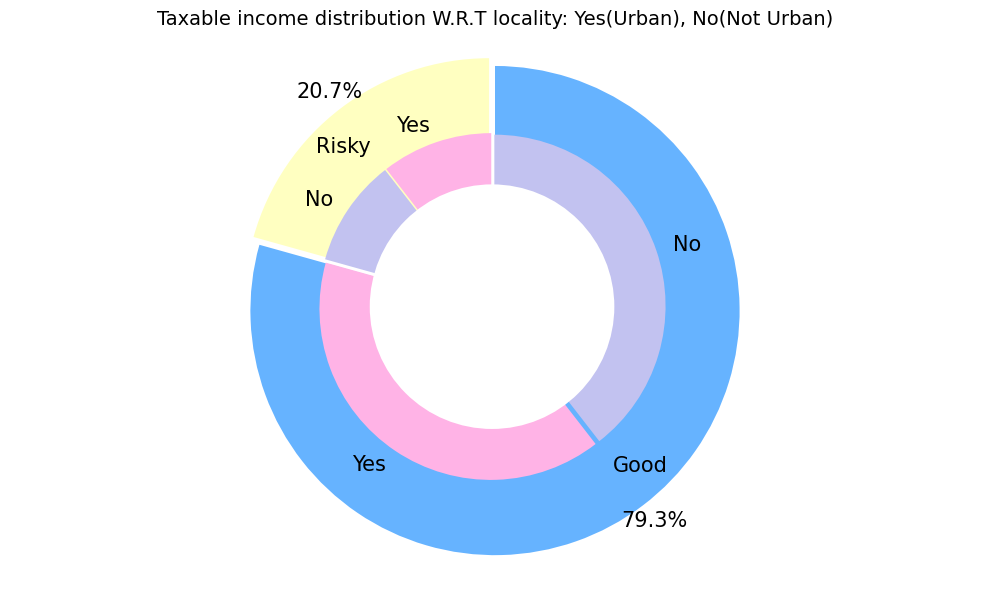

In [161]:
plt.figure(figsize=(10,6))
labels =["Risky", "Good"]
values = [Fraud_new["Taxabale.Category"][Fraud_new["Taxabale.Category"] == 'Risky'].groupby(by = Fraud_new["Urban"]).count().sum(),
         Fraud_new["Taxabale.Category"][Fraud_new["Taxabale.Category"] == 'Good'].groupby(by = Fraud_new["Urban"]).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [63,61 , 239,237]
colors = ['#ff66', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15, 'rotation':'horizontal'}
#Plot
plt.pie(values, labels=labels, autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution W.R.T locality: Yes(Urban), No(Not Urban)', fontsize=14)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

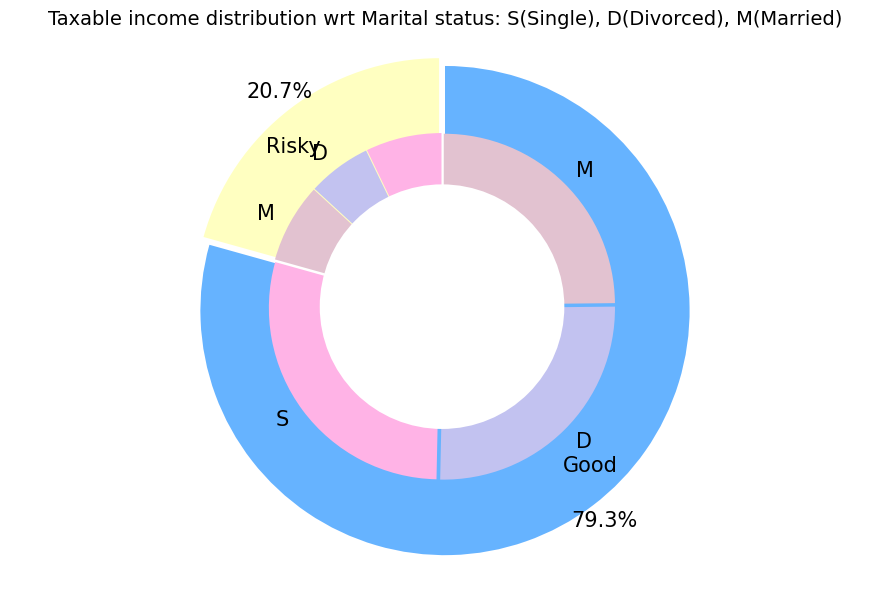

In [164]:
plt.figure(figsize=(9,6))
labels =["Risky", "Good"]
values = [Fraud_new["Taxabale.Category"][Fraud_new["Taxabale.Category"] == 'Risky'].groupby(by = Fraud_new["Marital.Status"]).count().sum(),
         Fraud_new["Taxabale.Category"][Fraud_new["Taxabale.Category"] == 'Good'].groupby(by = Fraud_new["Marital.Status"]).count().sum()]
labels_gender = ["","D","M","S","D", "M"]
sizes_gender = [43,36,45,174,153,149]
colors = ['#ff66', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#e2c2d0','#ffb3e6', '#c2c2f0', '#e2c2d0']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)
textprops = {"fontsize":15, 'rotation':'horizontal'}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution wrt Marital status: S(Single), D(Divorced), M(Married)', fontsize=14)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

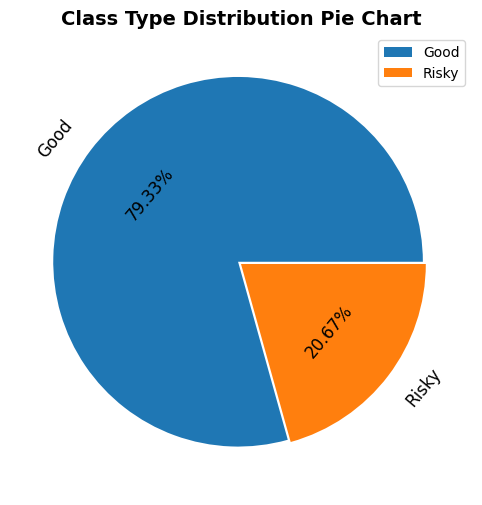

In [165]:
plt.figure(figsize = (12,6))
plt.pie(Fraud_new['Taxabale.Category'].value_counts(),labels= Fraud_new['Taxabale.Category'].unique(),
       explode = [0.02,0.0], autopct= '%.2f%%',textprops = {'size':'large','rotation':50,'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

In [167]:
Fraud_new['Taxabale.Category'].value_counts()

Good     476
Risky    124
Name: Taxabale.Category, dtype: int64

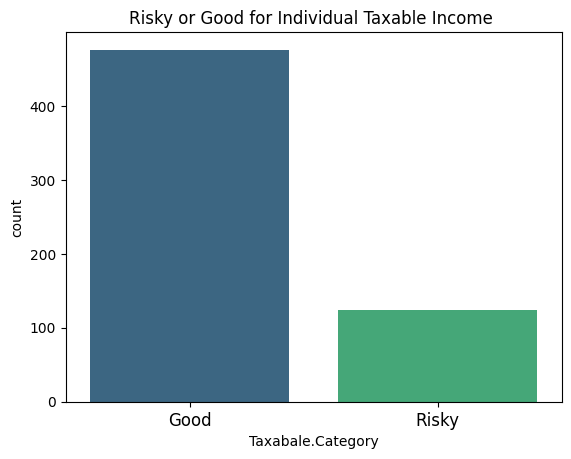

In [169]:
sns.countplot(x='Taxabale.Category', data=Fraud_new, palette = 'viridis', order=Fraud_new['Taxabale.Category'].value_counts().index,color='pink')
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')
plt.show()

In [171]:
Fraud_Newdata = Fraud_new.copy()
Fraud_Newdata .rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience','Taxabale.Category':'Taxabale_Category'}, inplace = True)
Fraud_Newdata .drop('Taxable_Income', axis=1, inplace = True)
categorical_features = Fraud_Newdata .describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'Taxabale_Category'], dtype='object')

In [172]:
Fraud_Newdata.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'Taxabale_Category'],
      dtype='object')

In [173]:
le = LabelEncoder()
for col in categorical_features:
        le.fit(Fraud_Newdata[col])
        Fraud_Newdata[col] = le.transform(Fraud_Newdata[col])
Fraud_Newdata.head()

Undergrad  Marital_Status  City_Population  Work_Experience  Urban  \
0          0               2            50047               10      1   
1          1               0           134075               18      1   
2          0               1           160205               30      1   
3          1               2           193264               15      1   
4          0               1            27533               28      0   

   Taxabale_Category  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [174]:
Fraud_Newdata.Taxabale_Category.value_counts()

0    476
1    124
Name: Taxabale_Category, dtype: int64

**Model Building**

In [176]:
#StratifiedKFold

x = Fraud_Newdata.drop('Taxabale_Category',axis=1)
y = Fraud_Newdata[['Taxabale_Category']]

In [177]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions

for train_ix, test_ix in skf.split(x, y):

# select rows

    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# summarize train and test composition

    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60
>Train: 0=540, 1=540, Test: 0=60, 1=60


In [178]:
#Test Train Split With Imbalanced Dataset

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

In [179]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=480, 1=480, Test: 0=120, 1=120


In [180]:
# summarize train and test composition

counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({'Taxabale_Category': 1}) Testing Data Counter({'Taxabale_Category': 1})


In [181]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (480, 5)
Shape of x_test  :  (120, 5)
Shape of y_train :  (480, 1)
Shape of y_test  :  (120, 1)


In [182]:
#Grid Search using Stratified Kfold Splits on Imbalanced Dataset

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [183]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], 
          "max_depth":[2,3,4,5,6,7,8], "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=12)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_x, train_y)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=True)
print_score(tree_clf, train_x, train_y, test_x, test_y, train=False)

Fitting 3 folds for each of 1372 candidates, totalling 4116 fits
Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 79.81%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799625    0.666667  0.798148    0.733146      0.772295
recall       0.995338    0.036036  0.798148    0.515687      0.798148
f1-score     0.886812    0.068376  0.798148    0.477594      0.718578
support    429.000000  111.000000  0.798148  540.000000    540.000000
__________________________________________________________________________
Confusion Matrix: 
 [[427   2]
 [107   4]]

Test Result:
Accuracy Score: 78.33%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision  

In [184]:
decision_tree = DecisionTreeClassifier()
skf1 = StratifiedKFold(n_splits=15, shuffle=True, random_state=12)

results = cross_val_score(decision_tree, train_x, train_y, cv=skf1)
print(results.mean())

0.6370370370370371


In [185]:
params1 = {"criterion":["gini","entropy"], "max_depth":[2,3,4,5,6,7,8],
              "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

grid = GridSearchCV(decision_tree, param_grid = params1, cv=skf1, verbose=1, n_jobs=6)
grid.fit(train_x,train_y)
model1 = grid.best_estimator_

Fitting 15 folds for each of 686 candidates, totalling 10290 fits


In [186]:
grid.best_score_

0.7925925925925928

In [187]:
predict_output1 = model1.predict(test_x)
accuracy_test1 = accuracy_score(test_y,predict_output1)
accuracy_test1

0.7833333333333333

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        47
           1       0.00      0.00      0.00        13

    accuracy                           0.78        60
   macro avg       0.39      0.50      0.44        60
weighted avg       0.61      0.78      0.69        60



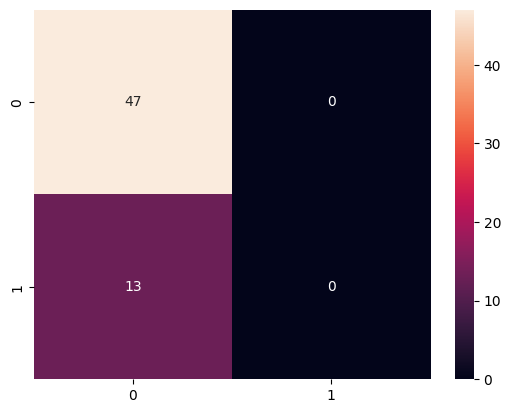

In [188]:
sns.heatmap(confusion_matrix(test_y, predict_output1), annot=True)
print(classification_report(test_y,predict_output1))

**Pruning Of Data**

In [189]:
params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], 
          "max_depth":[2,3,4,5,6,7,8], "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=22)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 1372 candidates, totalling 4116 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 79.38%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.793750   0.0   0.79375    0.396875      0.630039
recall       1.000000   0.0   0.79375    0.500000      0.793750
f1-score     0.885017   0.0   0.79375    0.442509      0.702483
support    381.000000  99.0   0.79375  480.000000    480.000000
__________________________________________________________________________
Confusion Matrix: 
 [[381   0]
 [ 99   0]]

Test Result:
Accuracy Score: 79.17%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy   macro avg  weighted avg
precision   0.791667   0.0  0.791667    

In [190]:
#Get Score For Different Values Of N

Decision_tree = DecisionTreeClassifier()
skf2 = StratifiedKFold(n_splits=15, shuffle=True, random_state=14)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf2)
print(results.mean())

0.6583333333333333


In [191]:
params2 = {"criterion":["gini","entropy"], "max_depth":[2,3,4,5,6,7,8],
              "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

grid = GridSearchCV(Decision_tree, param_grid = params2, cv=skf2, verbose=1, n_jobs=6)
grid.fit(x_train,y_train)
model2 = grid.best_estimator_

Fitting 15 folds for each of 686 candidates, totalling 10290 fits


In [192]:
grid.best_score_

0.7958333333333333

In [193]:
predict_output2 = model2.predict(x_test)
accuracy_test2 = accuracy_score(y_test,predict_output2)
accuracy_test2

0.7916666666666666

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



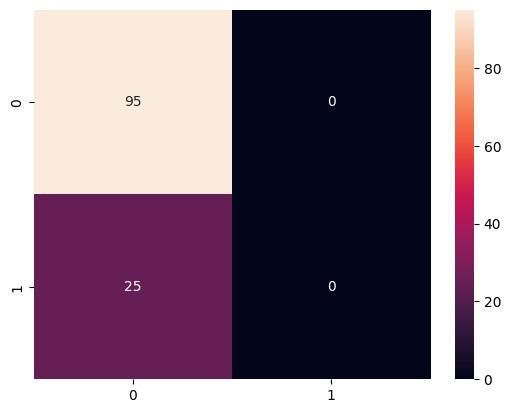

In [194]:
sns.heatmap(confusion_matrix(y_test, predict_output2),annot=True)
print(classification_report(y_test,predict_output2))

pruning the data to bakance it,so we can get high accuracy rate

In [195]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {"criterion":["gini", "entropy"], "splitter":["best", "random"], "max_depth":[2,3,4,5,6,7,8], 
          "min_samples_split":[2,3,4,5,6,7,8], "min_samples_leaf":[2,3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=123)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 1372 candidates, totalling 13720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 79.79%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.797071   1.000000  0.797917    0.898536      0.838925
recall       1.000000   0.020202  0.797917    0.510101      0.797917
f1-score     0.887078   0.039604  0.797917    0.463341      0.712286
support    381.000000  99.000000  0.797917  480.000000    480.000000
__________________________________________________________________________
Confusion Matrix: 
 [[381   0]
 [ 97   2]]

Test Result:
Accuracy Score: 79.17%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy   macro avg  weighted avg
precision   

In [196]:
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [197]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

In [198]:
print('Training Accuracy :',accuracy_score(y_train, pred_train).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test).round(3))

Training Accuracy : 0.798
Testing Accuracy  : 0.792


In [199]:
#Building Decision Tree
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=10)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

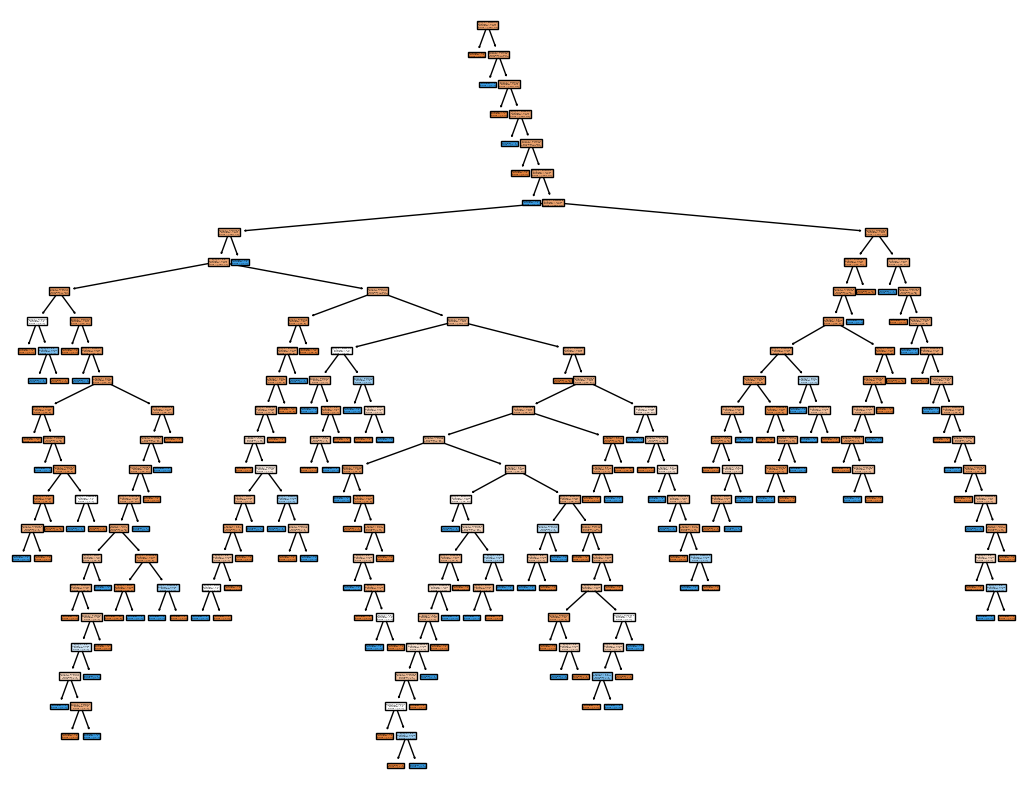

In [200]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [201]:
preds = model_entropy.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    95
1    25
dtype: int64

In [202]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        95
           1       0.20      0.20      0.20        25

    accuracy                           0.67       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.67      0.67      0.67       120



In [203]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=11, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.007057557152094937


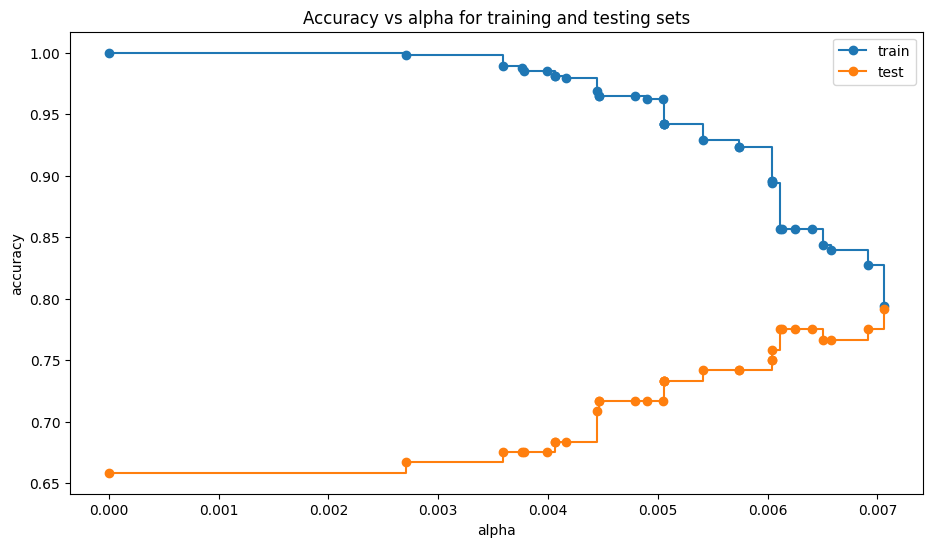

In [204]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [205]:
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=144, ccp_alpha=0.00705)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00705, criterion='entropy', random_state=144)

In [206]:
pred_train1 = clf1.predict(x_train)
pred_test1 = clf1.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train1).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test1).round(3))


Training Accuracy : 0.827
Testing Accuracy  : 0.775


              precision    recall  f1-score   support

           0       0.79      0.97      0.87        95
           1       0.25      0.04      0.07        25

    accuracy                           0.78       120
   macro avg       0.52      0.50      0.47       120
weighted avg       0.68      0.78      0.70       120



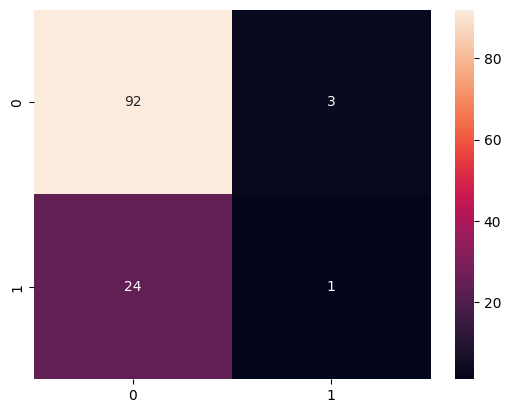

In [207]:
sns.heatmap(confusion_matrix(y_test, pred_test1),annot=True)
print(classification_report(y_test,pred_test1))

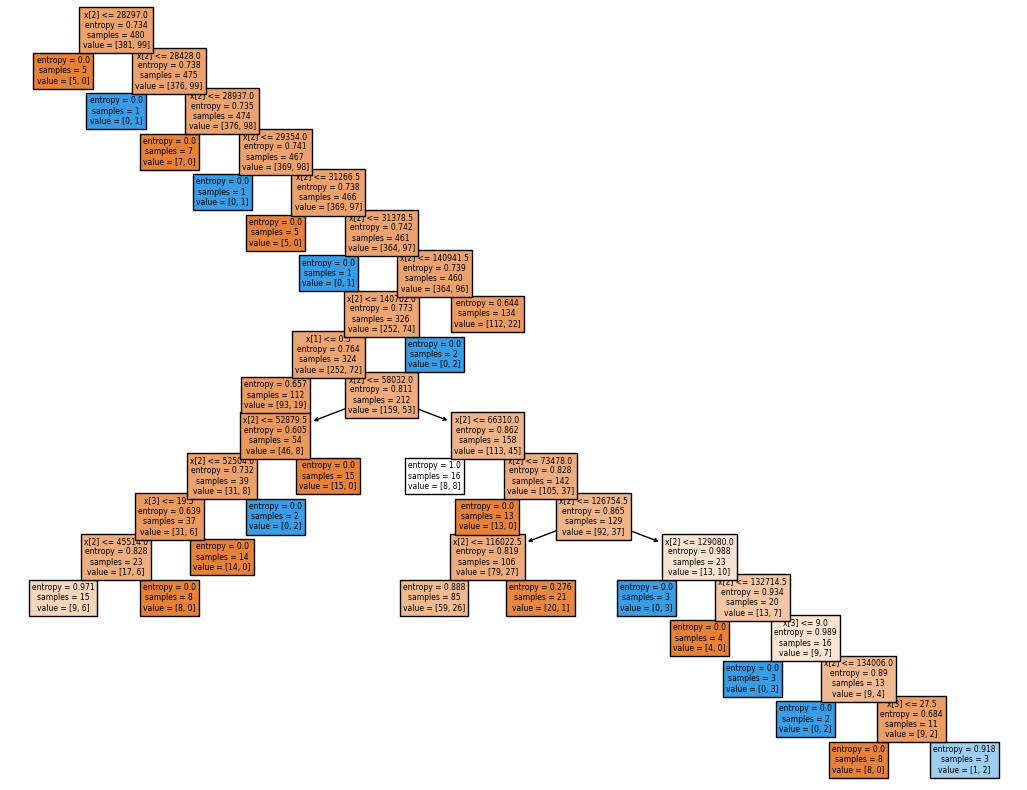

In [208]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf1,filled=True)
plt.show()

In [209]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=10)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

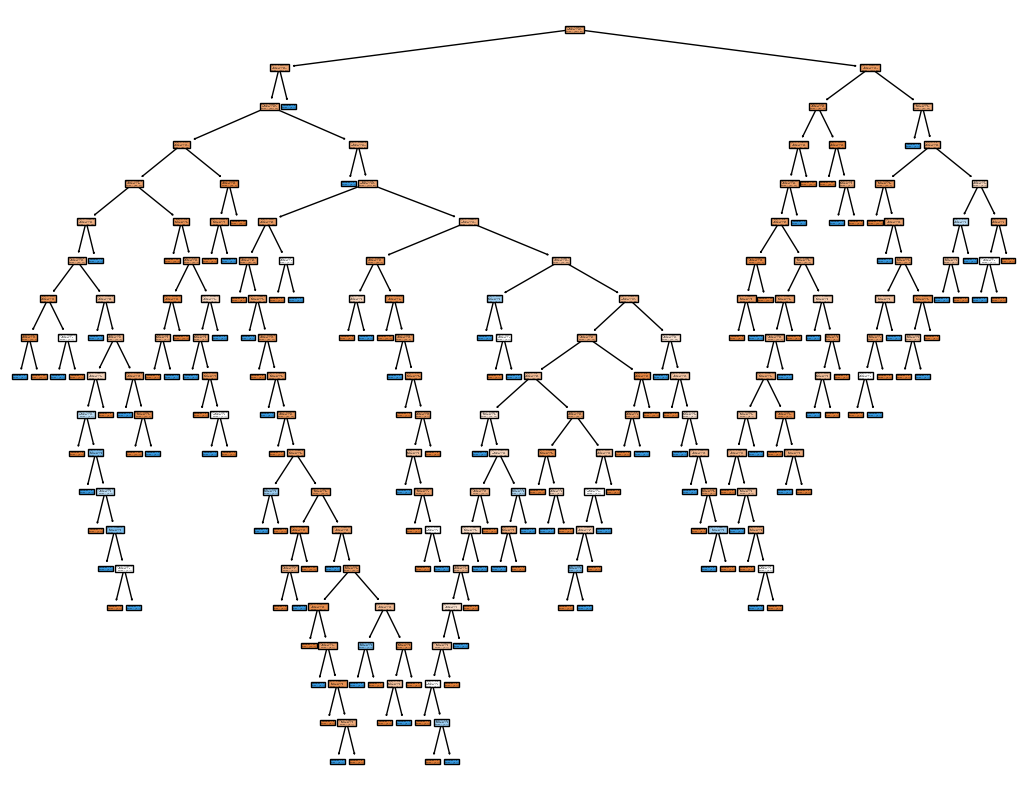

In [210]:
plt.figure(figsize=(13,10))
tree.plot_tree(model_gini,filled=True)
plt.show()

In [211]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    91
1    29
dtype: int64

In [212]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        95
           1       0.24      0.28      0.26        25

    accuracy                           0.67       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.69      0.67      0.68       120



In [213]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.004560921628414483


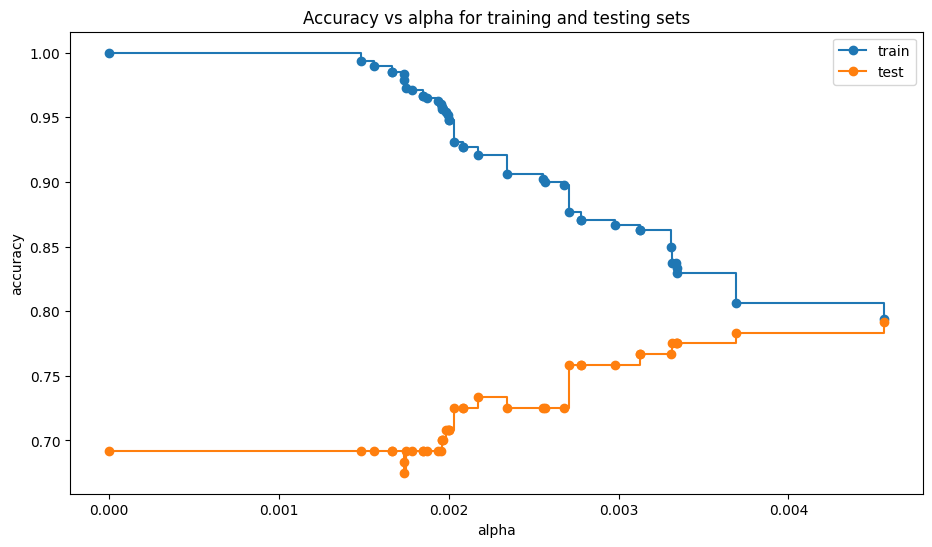

In [214]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(11,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [215]:
clf2 = DecisionTreeClassifier(criterion='gini',random_state=145, ccp_alpha=0.00456)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00456, random_state=145)

In [216]:
pred_train2 = clf2.predict(x_train)
pred_test2 = clf2.predict(x_test)

print('Training Accuracy :',accuracy_score(y_train, pred_train2).round(3))
print('Testing Accuracy  :',accuracy_score(y_test, pred_test2).round(3))

Training Accuracy : 0.806
Testing Accuracy  : 0.783


              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



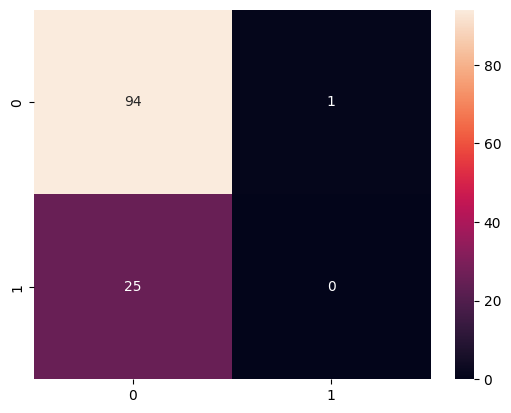

In [217]:
sns.heatmap(confusion_matrix(y_test, pred_test2),annot=True)
print(classification_report(y_test,pred_test2))

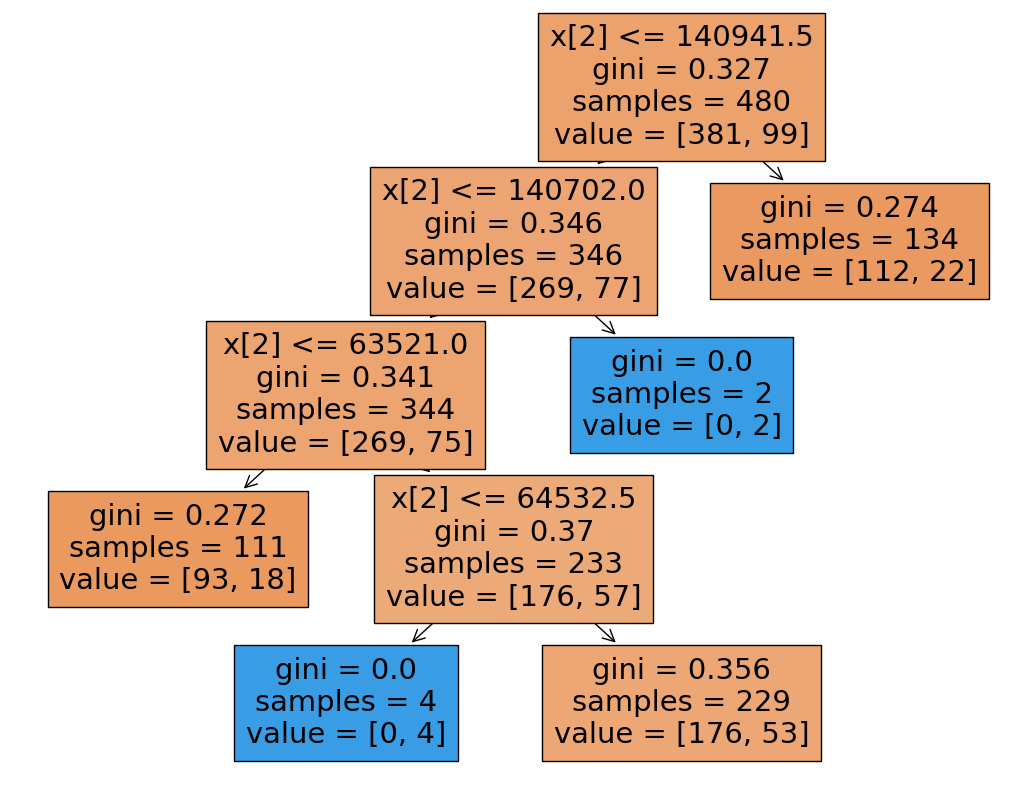

In [218]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf2,filled=True)
plt.show()

In [219]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test) * 100:.2f}%")

Training Accuracy: 79.79%
Testing Accuracy : 79.17%


In [220]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train1) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test1) * 100:.2f}%")

Training Accuracy: 82.71%
Testing Accuracy : 77.50%


In [221]:
print(f"Training Accuracy: {accuracy_score(y_train, pred_train2) * 100:.2f}%")
print(f"Testing Accuracy : {accuracy_score(y_test, pred_test2) * 100:.2f}%")

Training Accuracy: 80.62%
Testing Accuracy : 78.33%


In [222]:
from pickle import dump
dump(tree_clf,open('fraud_check_intell.pkl','wb'))